Directory Check!
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zipf_1.2/fdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zipf_1.2/nofdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zipf_1.2/fdp_share/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/PI/zipf_1.2/fdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/PI/zipf_1.2/nofdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/PI/zipf_1.2/fdp_share/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zoned/fdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zoned/nofdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zoned/fdp_share/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cyl

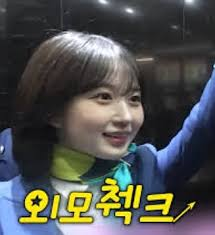

Directory Check!


In [2]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import seaborn as sns 
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import re 
import sys
import os
import collections
from inho_parser import * 
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import seaborn as sns 
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import re 
import sys
import os
import collections
import inho_parser
from inho_parser import * 
from math import *
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 24
## ------------------------------------------------------------- ##
##              Example waf parser in warmup in FADU             ##
## ------------------------------------------------------------- ##
# ----------------------- Regular Expr. ------------------------- #
output_re=re.compile(r'.*_output')
num_re=re.compile(r'[0-9]+')
hbmw_re=re.compile(r'.*(HBMW)')
mbmw_re=re.compile(r'.*(MBMW)')
mbe_mre=re.compile(r'.*(MBE)')
mbe_re=re.compile(r'.*(MBE)')

total_bw_re=re.compile(r'.*READ: bw=')
nvme_iostat_re=re.compile(r'nvme1n1')
#write_bw_re=re.compile()
# ----------------------- Figure Expr. ------------------------- #

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 24
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
mpl.rcParams['savefig.pad_inches'] = 0
isConference=True

dev_list = []
re_dev=re.compile(r'^FADU-FDP+|^Samsung+')
#%ls './FEMU/'


def first_available_font(candidates):
    available = {f.name for f in fm.fontManager.ttflist}
    for name in candidates:
        if name in available:
            return name
    return None

def get_per_ruh_waf_to_dict (data_dir, filename=None, verbose=None):
    # ----------------------- Regular Expr. ------------------------- #
    ruh_re=re.compile(r'^Reclaim Unit Handle.*')
    num_re=re.compile(r'[0-9]+')
    hbmw_re=re.compile(r'.*(HBMW)')
    mbmw_re=re.compile(r'.*(MBMW)')
    mbe_re=re.compile(r'.*(MBE)')
    # ---------------------------------------------------------------- #

    if filename is None:
        filename = "samsung_waf_1sec.txt"
    if verbose is None : 
        verbose = False
    # ---------------------------------------------------------------- #

    ruh_waf = {} 
    waf_data = data_dir+filename
    file1 = open(waf_data, 'r')
    Lines = file1.readlines()
    start_h = None
    start_d = None
    start_e = None
    for line in Lines:
        line = ''.join(line).strip().replace(",", '')
        if ruh_re.match(line) :
            l = num_re.findall(line)
            ruhid = int(l[0])
            hbmw = int(l[3])
            mbmw = int(l[4])
            if (ruhid == 0) or (ruhid == 1) or (ruhid == 2) or (ruhid == 15)or (ruhid == 7):
                if (hbmw == 0) or (mbmw == 0):
                    #print (ruhid , 1.0)
                    if not (ruhid in ruh_waf):
                        ruh_waf[ruhid] = [float(1.0)]
                    else:
                        ruh_waf[ruhid].append(float(1.0))
                else:
                    #print(ruhid, mbmw/hbmw)
                    if not (ruhid in ruh_waf):
                        ruh_waf[ruhid] = [mbmw/hbmw]
                    else:
                        ruh_waf[ruhid].append(float(mbmw/hbmw))
    if not (verbose):
        for key in ruh_waf.keys():
            print(key, ruh_waf[key][-1] )
            #ax[i].plot(range(len(ruh_waf[key])), ruh_waf[key] , label = key)
            #ax[i].set_ylim([0.99, 4.0])
            #ax[i].set_title(t)

    return ruh_waf

def get_per_ruh_mb_to_list (data_dir, filename=None, verbose=None):
    # ----------------------- Regular Expr. ------------------------- #
    ruh_re=re.compile(r'^Reclaim Unit Handle.*')
    num_re=re.compile(r'[0-9]+')
    hbmw_re=re.compile(r'.*(HBMW)')
    mbmw_re=re.compile(r'.*(MBMW)')
    mbe_re=re.compile(r'.*(MBE)')
    # ---------------------------------------------------------------- #

    if filename is None:
        filename = "samsung_waf_1sec.txt"
    if verbose is None : 
        verbose = False
    # ---------------------------------------------------------------- #

    ruh_waf = {} 
    ruh_hbmw = {}
    ruh_mbmw = {}
    waf_data = data_dir+filename
    file1 = open(waf_data, 'r')
    Lines = file1.readlines()
    start_h = None
    start_d = None
    start_e = None
    for line in Lines:
        line = ''.join(line).strip().replace(",", '')
        if ruh_re.match(line) :
            l = num_re.findall(line)
            ruhid = int(l[0])
            hbmw = int(l[3])
            mbmw = int(l[4])
            if (ruhid == 0) or (ruhid == 1)or (ruhid == 2) or (ruhid == 15)or (ruhid == 7):
                if (hbmw == 0) or (mbmw == 0):
                    #print (ruhid , 1.0)
                    if not (ruhid in ruh_hbmw):
                        #ruh_waf[ruhid] = [float(1.0)]
                        ruh_hbmw[ruhid] = [int(0)]
                        ruh_mbmw[ruhid] = [int(0)]
                    else:
                        #ruh_waf[ruhid].append(float(1.0))
                        ruh_hbmw[ruhid].append(int(0))
                        ruh_mbmw[ruhid].append(int(0))
                else:
                    #print(ruhid, mbmw/hbmw)
                    if not (ruhid in ruh_hbmw):
                        #ruh_waf[ruhid] = [mbmw/hbmw]
                        ruh_hbmw[ruhid] = [int(0)]
                        ruh_mbmw[ruhid] = [int(0)]
                    else:
                        #ruh_waf[ruhid].append(float(mbmw/hbmw))
                        ruh_hbmw[ruhid].append(hbmw)
                        ruh_mbmw[ruhid].append(mbmw)
    if not (verbose):
        for key in ruh_waf.keys():
            print(key, ruh_waf[key][-1] )
            #ax[i].plot(range(len(ruh_waf[key])), ruh_waf[key] , label = key)
            #ax[i].set_ylim([0.99, 4.0])
            #ax[i].set_title(t)

    return [ruh_hbmw,ruh_mbmw]

def get_per_ruh_waf_to_list (data_dir, subdir, filename=None, verbose=None):
    # ---------------------------------------------------------------- #
    if filename is None:
        filename = "samsung_waf_1sec.txt"
    # ---------------------------------------------------------------- #
    per_ruh_waf_list = []

    for i,t in enumerate(subdir):
        per_ruh_waf_list.append(get_per_ruh_waf_to_dict(data_dir+t, filename=None))
        print(t)

    
    return per_ruh_waf_list


# Prefer Arial; otherwise use Liberation Sans, then Lato, then DejaVu Sans
math_family = first_available_font(['Arial', 'Liberation Sans', 'Lato', 'DejaVu Sans'])
if math_family is None:
    print("WTF DejaVu Sans")
    math_family = 'DejaVu Sans'  # last-resort

# Make mathtext use the chosen family (instead of DejaVu fallback)
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = math_family
mpl.rcParams['mathtext.it'] = f'{math_family}:italic'
mpl.rcParams['mathtext.bf'] = f'{math_family}:bold'

# Try to use Helvetica or fallback to similar fonts
# Step 1: Provide full path to Helvetica.ttc
# Load Helvetica.ttc manually
font_path = "./archive/Helvetica.ttc"
helvetica_prop = fm.FontProperties(fname=font_path)
# Step 1: Manually load Helvetica.ttc
font_path = './archive/Helvetica.ttc'
helvetica_font = fm.FontProperties(fname=font_path)
font_name = helvetica_font.get_name()

# Step 2: Add to font manager cache
fm.fontManager.addfont(font_path)

# Step 3: Now set as default
mpl.rcParams['font.family'] = font_name
mpl.rcParams['font.family'] = helvetica_prop.get_name()


#!pip3 install IPython
import IPython
from IPython.display import Image
import os
from colorama import Fore, Style

def check_file_existence(directory, filename=None):
    if(filename == None):
        filename = "samsung_waf_1sec.txt"
    file_path = os.path.join(directory, filename)
    if os.path.exists(file_path):
        print(f"{Fore.GREEN}[Check!]{Style.RESET_ALL} {file_path}")
        return 1
    else:
        print(f"{Fore.RED}['No such file/dir']{Style.RESET_ALL} {file_path}")
        return 0 

print("Directory Check!")

dirpath="/data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/"

ruht_dirs=[
    'II/',
    'PI/'
]

workloads = [
    'zipf_1.2/',
    'zoned/',
    '90rand_zipf1.2/',
    'sq0_90r_zipf_1.2/',
]
subdirs=[
    'fdp/',
    'nofdp/',
    'fdp_share/'
]

#filename = input("Enter the filename to check: ")
for w in workloads:
    for ruht in ruht_dirs:
        for sdir in subdirs:
            check_file_existence(dirpath+ruht+w+sdir)
#Image("/data/inho/OH1_.png") 
display(Image("/data/inho/check.png"))
print("Directory Check!")


./archive/result-FIO/ssdb/warmup/fadu_waf_1min.txt
./archive/result-FIO/ssdb/warmup/
[Check!] ./archive/result-FIO/ssdb/warmup/fadu_waf_1min.txt


/tmp/ipykernel_2325532/1261426685.py:195: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([f"x{t}" for t in labels] , fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE+4)
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


hbmw_list_TB 65.80848172307014
./archive/result-FIO/ssda/warmup/samsung_waf_1min.txt
./archive/result-FIO/ssda/warmup/
[Check!] ./archive/result-FIO/ssda/warmup/samsung_waf_1min.txt
hbmw_list_TB 36.138960985893696


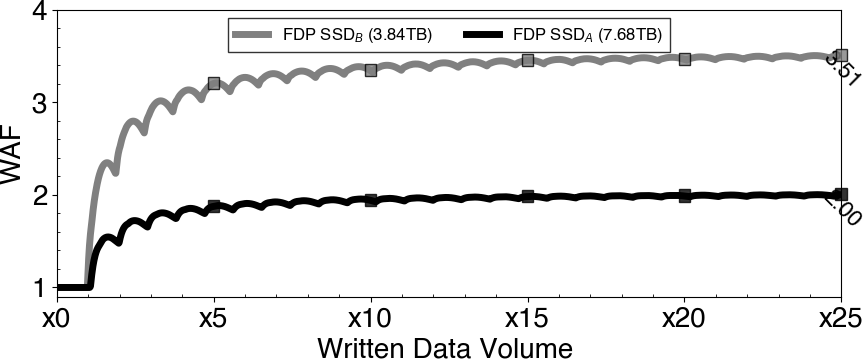

In [5]:
#------------------------------------------------------------#
fig, ax = plt.subplots(1,1, figsize=(9,4))
#------------------------------------------------------------#
ax2=ax
x_cut_lim = 25
hop=5
TEXT_FONT_SIZE = SMALL_SIZE
def x_cut_limit(hbmw_list_TB, waf_list, x_cut_lim=None):
    if x_cut_lim ==None:
        x_cut_lim = 25

    lim=len(hbmw_list_TB)
    for k, hb in enumerate(hbmw_list_TB):
        if hb >= x_cut_lim:
            lim = k
            break
    hbmw_list_TB = hbmw_list_TB[:lim]
    waf_list = waf_list[:lim]

    return [hbmw_list_TB,waf_list]
#------------------------------------------------------------#

def get_waf_by_aligned_hbmw(data_dir:str, scale:float, filename=None, x_cut=None):
    waf_text_index = []
    try :
        print(data_dir)
        #d = output_to_dictionary(data_dir)
        #file1 = open(data_dir, 'r')
        #Lines = file1.readlines()
        if filename == None : 
            filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir,filename)
        info_list = waf_log_to_waf_lists(data_dir,filename)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        #mbmw_list= info_list[2] 
        #erase_list= info_list[3] 
        hbmw_list_TB = [ x / scale for x in hbmw_list]
        print("hbmw_list_TB", hbmw_list_TB[-1])
        #ax_xdata.append(d.keys())
        #ax_ydata.append([np.mean(x) for x in d.values()])
        cnt=0
        waf_text_index.append( waf_list[0] )
        local_waf_index=[ ]
        next_fill_index=0
        for i,hb in enumerate(hbmw_list_TB) :
            if hb > (next_fill_index) + 0.95 and hb < (next_fill_index+1) + 0.015 : 
                #print(waf_list[i], i, hb)
                cnt+=1
                local_waf_index.append(waf_list[i])
                continue
            else:
                if cnt >= 1:
                    #print (local_waf_index, next_fill_index+1)
                    waf_text_index.append( round(np.mean(local_waf_index),4) )
                    cnt=0
                    local_waf_index=[ ]
                    next_fill_index += 1
            
    except FileNotFoundError:
        print(" [FILE NOT FOUND]!? {0}".format(data_dir))


    if x_cut != None and x_cut > 0 :
        waf_text_index = waf_text_index[:x_cut]

    return waf_text_index

#print (data_dir+filename)
# this_dev_cap_TB = 7.68
# x_cut_lim = 12

TEXT_FONT_SIZE=MEDIUM_SIZE
# Prefer Arial; otherwise use Liberation Sans, then Lato, then DejaVu Sans
math_family = first_available_font(['Arial', 'Liberation Sans', 'Lato', 'DejaVu Sans'])
if math_family is None:
    print("WTF DejaVu Sans")
    math_family = 'DejaVu Sans'  # last-resort

# Make mathtext use the chosen family (instead of DejaVu fallback)
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = math_family
mpl.rcParams['mathtext.it'] = f'{math_family}:italic'
mpl.rcParams['mathtext.bf'] = f'{math_family}:bold'

# Try to use Helvetica or fallback to similar fonts
# Step 1: Provide full path to Helvetica.ttc
# Load Helvetica.ttc manually
font_path = "/home/inho/.fonts/Helvetica.ttc"
helvetica_prop = fm.FontProperties(fname=font_path)
# Step 1: Manually load Helvetica.ttc
font_path = '/home/inho/.fonts/Helvetica.ttc'
helvetica_font = fm.FontProperties(fname=font_path)
font_name = helvetica_font.get_name()

# Step 2: Add to font manager cache
fm.fontManager.addfont(font_path)

# Step 3: Now set as default
mpl.rcParams['font.family'] = font_name
mpl.rcParams['font.family'] = helvetica_prop.get_name()


#------------------------------------------------------------#


#------------------------------------------------------------#
waf_list_label = [r'FDP SSD$_{B}$ (3.84TB)']
waf_list_color = ['gray']
waf_list_bar = []
hop=5
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/ssdb/warmup/" 
    filename="fadu_waf_1min.txt"
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_TB = [ x / 3.84 for x in hbmw_list ]
    ret = x_cut_limit(hbmw_list_TB,waf_list,x_cut_lim)
    hbmw_list_TB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#

    #ax1.plot( range(0, len(mbmw_list[1:])) , mbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='black', label='Dev')
    # ax1.plot( range(0, len(erase_list[1:])) , erase_list[1:] , linewidth=4, marker='x', markersize=1, color='gray', label='erase', alpha=0.5)
    #ax1.plot( range(0, len(hbmw_list[1:])) , hbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    #ax1.plot( range(0, len(hbmw_list_GB[1:])) , hbmw_list_GB[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    ax2.plot( hbmw_list_TB, waf_list, linewidth=5, color=waf_list_color[i], label= waf_list_label[i])
    #ax2.plot( range(0, len(waf_list)), waf_list, linewidth=0.1, marker='o', markersize=1 ,color=waf_list_color[i], label= waf_list_label[i])
    # for j, v in enumerate(waf_list[::100]):
    #     ax1.text(j*100, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    # for j, v in enumerate(waf_list[::1000]):
    #     ax2.text(j*1000, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    my_waf_text_index = get_waf_by_aligned_hbmw(data_dir, 3.84, filename,x_cut_lim)
    for j, v in enumerate(my_waf_text_index[::hop]):
            if j> 0:
                #ax2.text(j*hop+1.2, v-0.3, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45)
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=waf_list_color[0], alpha=0.8))

v = waf_list[-1]
j = hbmw_list_TB[-1]
ax2.text(j, v-0.35, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45)
ax2.text(j, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=waf_list_color[0], alpha=0.8))
#------------------------------------------------------------#

#------------------------------------------------------------#
waf_list_label = [r'FDP SSD$_{A}$ (7.68TB)']
waf_list_color = ['black']
waf_list_bar = []
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/ssda/warmup/" 
    filename="samsung_waf_1min.txt"
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_TB = [ x / 7.68 for x in hbmw_list ]
    ret = x_cut_limit(hbmw_list_TB,waf_list,x_cut_lim)
    hbmw_list_TB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#
    hop=5
    ax2=ax
    ax2.plot( hbmw_list_TB, waf_list, linewidth=5, marker='o', markersize=1 ,color=waf_list_color[i], label= waf_list_label[i])
    my_waf_text_index = get_waf_by_aligned_hbmw(data_dir, 7.68, filename, x_cut_lim)
    for j, v in enumerate(my_waf_text_index[::hop]):
        if j> 0:
            #ax2.text(j*hop+1.2, v-0.3, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45)
            ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=waf_list_color[i], alpha=0.8))
v = waf_list[-1]
j = hbmw_list_TB[-1]
ax2.text(j, v-0.35, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45)
ax2.text(j, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=waf_list_color[0], alpha=0.8))
#------------------------------------------------------------#

#------------------------------------------------------------#
ax2.set_ylabel("WAF", fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE+4)
ax2.set_xlabel('Written Data Volume ', fontsize=MEDIUM_SIZE+4 , fontproperties=helvetica_prop)
ax2.set_xlim([0,25])

labels = [label.get_text() for label in ax2.get_xticklabels()]
ax2.set_xticklabels([f"x{t}" for t in labels] , fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE+4)
for label in ax2.get_yticklabels():
    label.set_fontproperties(helvetica_prop)
    label.set_fontsize(MEDIUM_SIZE+4)
ax2.legend(loc='upper center', fancybox=False, edgecolor='k' ,frameon=True, prop=helvetica_prop, fontsize=BIGGER_SIZE , ncol=2)
#plt.minorticks_on()
ax.tick_params(axis='x', which='minor', direction='in')
ax.tick_params(axis='y', which='minor', direction='in')
ax.minorticks_on()
ax.set_ylim(0.9,4)
#------------------------------------------------------------#
fig.tight_layout()

# ------------------- 
# ------------------- #


./archive/result-Cachelib/samsung/kv202206/soc4/nofdp/
[Check!] ./archive/result-Cachelib/samsung/kv202206/soc4/nofdp/samsung_waf_1min.txt
hbmw_list_TB 28.173136827535927
./archive/result-Cachelib/samsung/kv202206/soc4/fdp/
[Check!] ./archive/result-Cachelib/samsung/kv202206/soc4/fdp/samsung_waf_1min.txt
hbmw_list_TB 8.901545498035073
./archive/result-Cachelib/samsung/kv202206/soc20/nofdp/
[Check!] ./archive/result-Cachelib/samsung/kv202206/soc20/nofdp/samsung_waf_1min.txt
hbmw_list_TB 3.8649870606604964
./archive/result-Cachelib/samsung/kv202206/soc20/fdp/
[Check!] ./archive/result-Cachelib/samsung/kv202206/soc20/fdp/samsung_waf_1min.txt
hbmw_list_TB 3.8621358243593327
./archive/result-Cachelib/samsung/kv202206/soc40/nofdp/
[Check!] ./archive/result-Cachelib/samsung/kv202206/soc40/nofdp/samsung_waf_1min.txt
hbmw_list_TB 5.366584375830523


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


./archive/result-Cachelib/samsung/kv202206/soc40/fdp/
[Check!] ./archive/result-Cachelib/samsung/kv202206/soc40/fdp/samsung_waf_1min.txt
hbmw_list_TB 5.108450065017678


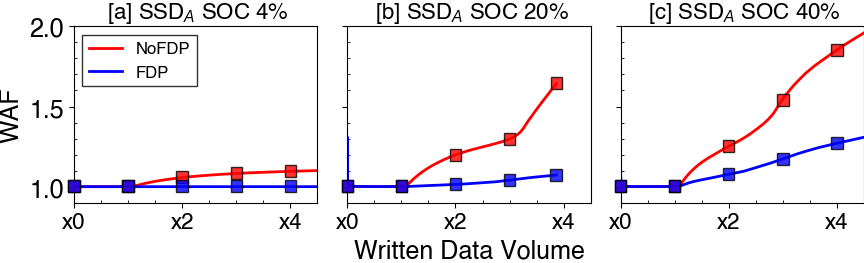

In [6]:
#------------------------------------------------------------#
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fig, ax = plt.subplots(1,3, figsize=(9,3), sharey=True)
#------------------------------------------------------------#

def first_available_font(candidates):
    available = {f.name for f in fm.fontManager.ttflist}
    for name in candidates:
        if name in available:
            return name
    return None

# Prefer Arial; otherwise use Liberation Sans, then Lato, then DejaVu Sans
math_family = first_available_font(['Arial', 'Liberation Sans', 'Lato', 'DejaVu Sans'])
if math_family is None:
    print("WTF DejaVu Sans")
    math_family = 'DejaVu Sans'  # last-resort

# Make mathtext use the chosen family (instead of DejaVu fallback)
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = math_family
mpl.rcParams['mathtext.it'] = f'{math_family}:italic'
mpl.rcParams['mathtext.bf'] = f'{math_family}:bold'

MEDIUM_PLUS_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_PLUS_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_PLUS_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

# Try to use Helvetica or fallback to similar fonts
# Step 1: Provide full path to Helvetica.ttc
# Load Helvetica.ttc manually
font_path = "./archive//Helvetica.ttc"
helvetica_prop = fm.FontProperties(fname=font_path)
# Step 1: Manually load Helvetica.ttc
font_path = './archive/Helvetica.ttc'
helvetica_font = fm.FontProperties(fname=font_path)
font_name = helvetica_font.get_name()

# Step 2: Add to font manager cache
fm.fontManager.addfont(font_path)

# Step 3: Now set as default
mpl.rcParams['font.family'] = font_name
mpl.rcParams['font.family'] = helvetica_prop.get_name()

data_dir = "./archive/result-Cachelib/samsung/kv202206/"  
workload = ['soc4/','soc20/', 'soc40/']
sub_dirs=[ 'nofdp/','fdp/']
filename="samsung_waf_1min.txt"
#print (data_dir+filename)
this_dev_cap_TB = 7.68
x_cut_lim = 5
TEXT_FONT_SIZE=SMALL_SIZE

#------------------------------------------------------------#

for i , w in enumerate(workload):
    for s, sdir in enumerate(sub_dirs):
        path = data_dir + w  + sdir
        info_list = waf_log_to_waf_lists(path,filename)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 

        hbmw_list_TB = [ x/this_dev_cap_TB for x in hbmw_list] 

        #----------------------- Figure -----------------------#
        ax2=ax[i]

        my_waf_text_index = get_waf_by_aligned_hbmw(path, this_dev_cap_TB, filename, x_cut_lim)
        hop = 1
        a= 0.3

        if re.match('nofdp/', sdir)!=None : 
            ax2.plot(hbmw_list_TB, waf_list, linewidth=2, color='red', label='NoFDP')
            for j, v in enumerate(my_waf_text_index[::hop]):
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                #if j > 1:
                #    ax2.text(j*hop-a, v, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45, color='red')
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='red', alpha=0.8))    
            if (re.search("soc20/",w) != None ):
                #ax2.text(hbmw_list_TB[-1], waf_list[-1], "%.2f" % waf_list[-1], ha="center",color='red', fontsize=TEXT_FONT_SIZE, rotation=-45)
                ax2.text(hbmw_list_TB[-1], waf_list[-1], " " , ha="center", fontsize=0.1,  bbox=dict(facecolor='red', alpha=0.8))

        elif  re.match('fdp/', sdir)!=None : 
            ax2.plot(hbmw_list_TB, waf_list, linewidth=2, color='blue', label='FDP')
            if (re.search("soc4_",w) != None ):
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                    #if j > 3 :
                    #    ax2.text(j*hop+0.4, v, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45, color='blue')
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))
            else : 
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                    #if j > 1 and re.search('6204/', w) == None :
                    #    ax2.text(j*hop+a, v+0.05, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45, color='blue')
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))

            if (re.search("soc20/",w) != None ):
                #ax2.text(hbmw_list_TB[-1]+a, waf_list[-1]+0.05, "%.2f" % waf_list[-1],color='blue', ha="center", fontsize=TEXT_FONT_SIZE, rotation=45)
                ax2.text(hbmw_list_TB[-1], waf_list[-1], " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))

        
#------------------------------------------------------------#
def get_waf_by_aligned_hbmw(data_dir:str, scale:float, filename=None, x_cut=None):
    waf_text_index = []
    try :
        print(data_dir)
        #d = output_to_dictionary(data_dir)
        #file1 = open(data_dir, 'r')
        #Lines = file1.readlines()
        if filename == None : 
            filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir,filename)
        info_list = waf_log_to_waf_lists(data_dir,filename)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        #mbmw_list= info_list[2] 
        #erase_list= info_list[3] 
        hbmw_list_TB = [ x / scale for x in hbmw_list]
        print("hbmw_list_TB", hbmw_list_TB[-1])
        #ax_xdata.append(d.keys())
        #ax_ydata.append([np.mean(x) for x in d.values()])
        cnt=0
        waf_text_index.append( waf_list[0] )
        local_waf_index=[ ]
        next_fill_index=0
        for i,hb in enumerate(hbmw_list_TB) :
            if hb > (next_fill_index) + 0.9 and hb < (next_fill_index+1) + 0.1 : 
                #print(waf_list[i], i, hb)
                cnt+=1
                local_waf_index.append(waf_list[i])
                continue
            else:
                if cnt >= 1:
                    #print (local_waf_index, next_fill_index+1)
                    waf_text_index.append( round(np.mean(local_waf_index),4) )
                    cnt=0
                    local_waf_index=[ ]
                    next_fill_index += 1
            
    except FileNotFoundError:
        print(" [FILE NOT FOUND]!? {0}".format(data_dir))


    if x_cut != None and x_cut > 0 :
        waf_text_index = waf_text_index[:x_cut]

    return waf_text_index


#------------------------------------------------------------#

ax[0].set_title(" [a] SSD$_A$ SOC 4% ", fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
ax[1].set_title(" [b] SSD$_A$ SOC 20% ", fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
ax[2].set_title(" [c] SSD$_A$ SOC 40% ", fontproperties=helvetica_prop , fontsize=MEDIUM_SIZE)
#ax[0][1].set_title(" [d] WARP$_A$ SOC. 4% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
#ax[1][1].set_title(" [e] WARP$_A$ SOC 20% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
#ax[2][1].set_title(" [f] WARP$_A$ SOC 40% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)

# ax[2][0].set_xlabel(
#     r'$\mathrm{rHMW} = \frac{\mathrm{Host\ Media\ Written(TB)}}{\mathrm{Dev.\ Cap.\ (=7.68\ TB)}}$',
#     fontsize=MEDIUM_SIZE-2)
# ax[2][1].set_xlabel(
#     r'$\mathrm{rHMW} = \frac{\mathrm{Host\ Media\ Written(GB)}}{\mathrm{Dev.\ Cap.\ (=224\ GB)}}$',
#     fontsize=MEDIUM_SIZE-2)
ax[1].set_xlabel(
    'Written Data Volume',    fontsize=MEDIUM_SIZE+2)
ax[0].legend(loc='upper left', frameon=True,fancybox=False, edgecolor='k', fontsize=BIGGER_SIZE,prop=helvetica_prop )


for j,w in enumerate(workload):
    ax2 = ax[j]
    ax2.set_xticks([0,2,4])
    
    ax2.tick_params(axis='x', which='minor', direction='in')
    ax2.tick_params(axis='y', which='minor', direction='in')
    ax2.minorticks_on()
    
    labels = [label.get_text() for label in ax2.get_xticklabels()]
    ax2.set_xticklabels([f"x{t}" for t in labels], fontproperties=helvetica_prop,fontsize=MEDIUM_SIZE)
    #ax2.set_ylabel("DLWA", fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)

#------------------------------------------------------------#
label = ax[0].set_ylabel("WAF", fontproperties=helvetica_prop , fontsize=MEDIUM_SIZE+2)

for label in ax[0].get_yticklabels():
    label.set_fontproperties(helvetica_prop)
    label.set_fontsize(MEDIUM_SIZE+2)


for i in range(3):
    #ax[i].set_xlabel("Host Data Written (Relative to cap)")
    #ax[i][0].grid()
    ax[i].set_ylim([0.9,2.0])
    ax[i].set_xlim([0.0,4.5])
#ax[0][0].set_ylabel("DLWA", fontsize=MEDIUM_SIZE)

    
    
#fig.text(0.35, 0.01, r'X-axis: $\mathrm{rHMW} = \frac{\mathrm{Host\ Media\ Written(TB)}}{ Dev. Cap.(=7.68\ \mathrm{TB})}$', fontsize=MEDIUM_SIZE)
#fig.tight_layout(rect=[0, 0.1, 1, 1])
fig.tight_layout()

# ------------------- #
# ------------------- #



./archive/result-Cachelib/samsung/kv202206/soc4/nofdp/
[Check!] ./archive/result-Cachelib/samsung/kv202206/soc4/nofdp/samsung_waf_1min.txt
hbmw_list_TB 28.173136827535927
./archive/result-Cachelib/samsung/kv202206/soc4/fdp/
[Check!] ./archive/result-Cachelib/samsung/kv202206/soc4/fdp/samsung_waf_1min.txt
hbmw_list_TB 8.901545498035073
./archive/result-Cachelib/samsung/kv202206/soc20/nofdp/
[Check!] ./archive/result-Cachelib/samsung/kv202206/soc20/nofdp/samsung_waf_1min.txt
hbmw_list_TB 3.8649870606604964
./archive/result-Cachelib/samsung/kv202206/soc20/fdp/
[Check!] ./archive/result-Cachelib/samsung/kv202206/soc20/fdp/samsung_waf_1min.txt
hbmw_list_TB 3.8621358243593327
./archive/result-Cachelib/samsung/kv202206/soc40/nofdp/
[Check!] ./archive/result-Cachelib/samsung/kv202206/soc40/nofdp/samsung_waf_1min.txt
hbmw_list_TB 5.366584375830523
./archive/result-Cachelib/samsung/kv202206/soc40/fdp/
[Check!] ./archive/result-Cachelib/samsung/kv202206/soc40/fdp/samsung_waf_1min.txt
hbmw_list_TB

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


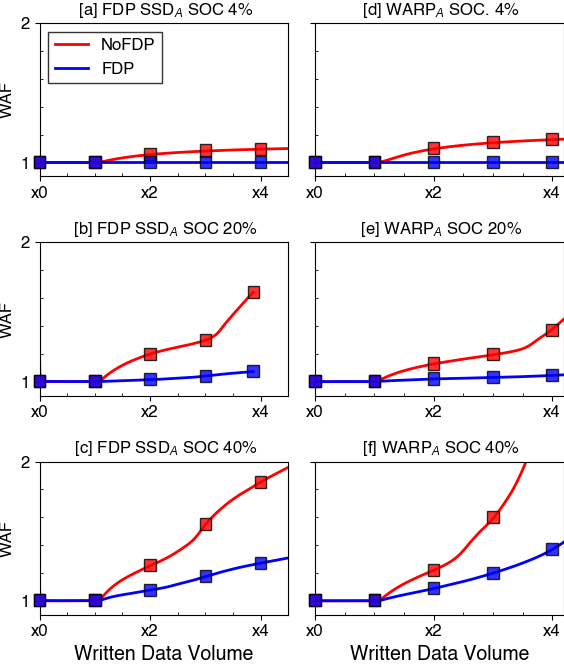

In [14]:
#------------------------------------------------------------#
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fig, ax = plt.subplots(3,2, figsize=(6,7), sharey=True)
#------------------------------------------------------------#

def first_available_font(candidates):
    available = {f.name for f in fm.fontManager.ttflist}
    for name in candidates:
        if name in available:
            return name
    return None

# Prefer Arial; otherwise use Liberation Sans, then Lato, then DejaVu Sans
math_family = first_available_font(['Arial', 'Liberation Sans', 'Lato', 'DejaVu Sans'])
if math_family is None:
    print("WTF DejaVu Sans")
    math_family = 'DejaVu Sans'  # last-resort

# Make mathtext use the chosen family (instead of DejaVu fallback)
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = math_family
mpl.rcParams['mathtext.it'] = f'{math_family}:italic'
mpl.rcParams['mathtext.bf'] = f'{math_family}:bold'

MEDIUM_PLUS_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_PLUS_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_PLUS_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

# Try to use Helvetica or fallback to similar fonts
# Step 1: Provide full path to Helvetica.ttc
# Load Helvetica.ttc manually
font_path = "./archive/Helvetica.ttc"
helvetica_prop = fm.FontProperties(fname=font_path)
# Step 1: Manually load Helvetica.ttc
font_path = './archive/Helvetica.ttc'
helvetica_font = fm.FontProperties(fname=font_path)
font_name = helvetica_font.get_name()

# Step 2: Add to font manager cache
fm.fontManager.addfont(font_path)

# Step 3: Now set as default
mpl.rcParams['font.family'] = font_name
mpl.rcParams['font.family'] = helvetica_prop.get_name()


#data_dir = "/home/inho/git/CacheLib/inho-run-cachelib/fdp_vs_nofdp/samsung/"    #soc 4%
data_dir = "./archive/result-Cachelib/samsung/kv202206/"    #soc 4%

workload = ['soc4/','soc20/', 'soc40/']
sub_dirs=[ 'nofdp/','fdp/']
filename="samsung_waf_1min.txt"
#print (data_dir+filename)
this_dev_cap_TB = 7.68
x_cut_lim = 5

TEXT_FONT_SIZE=SMALL_SIZE

#------------------------------------------------------------#

for i , w in enumerate(workload):
    for s, sdir in enumerate(sub_dirs):
        path = data_dir+ w + sdir 
        info_list = waf_log_to_waf_lists(path,filename)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 

        hbmw_list_TB = [ x/this_dev_cap_TB for x in hbmw_list] 

        #----------------------- Figure -----------------------#
        ax2=ax[i][0]

        my_waf_text_index = get_waf_by_aligned_hbmw(path, this_dev_cap_TB, filename, x_cut_lim)
        hop = 1
        a= 0.3

        if re.match('nofdp/', sdir)!=None : 
            ax2.plot(hbmw_list_TB, waf_list, linewidth=2, color='red', label='NoFDP')
            for j, v in enumerate(my_waf_text_index[::hop]):
                #if j > 1:
                #    ax2.text(j*hop-a, v, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45, color='red')
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='red', alpha=0.8))    
            if (re.search("soc20/",w) != None ):
                #ax2.text(hbmw_list_TB[-1], waf_list[-1], "%.2f" % waf_list[-1], ha="center",color='red', fontsize=TEXT_FONT_SIZE, rotation=-45)
                ax2.text(hbmw_list_TB[-1], waf_list[-1], " " , ha="center", fontsize=0.1,  bbox=dict(facecolor='red', alpha=0.8))

        elif  re.match('fdp/', sdir)!=None : 
            ax2.plot(hbmw_list_TB, waf_list, linewidth=2, color='blue', label='FDP')
            if (re.search("soc4_",w) != None ):
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                    #if j > 3 :
                    #    ax2.text(j*hop+0.4, v, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45, color='blue')
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))
            else : 
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                    #if j > 1 and re.search('6204/', w) == None :
                    #    ax2.text(j*hop+a, v+0.05, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45, color='blue')
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))

            if (re.search("soc20/",w) != None ):
                #ax2.text(hbmw_list_TB[-1]+a, waf_list[-1]+0.05, "%.2f" % waf_list[-1],color='blue', ha="center", fontsize=TEXT_FONT_SIZE, rotation=45)
                ax2.text(hbmw_list_TB[-1], waf_list[-1], " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))

        
#------------------------------------------------------------#
def get_waf_by_aligned_hbmw(data_dir:str, scale:float, filename=None, x_cut=None):
    waf_text_index = []
    try :
        print(data_dir)
        #d = output_to_dictionary(data_dir)
        #file1 = open(data_dir, 'r')
        #Lines = file1.readlines()
        if filename == None : 
            filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir,filename)
        info_list = waf_log_to_waf_lists(data_dir,filename)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        hbmw_list_TB = [ x / scale for x in hbmw_list]
        print("hbmw_list_TB", hbmw_list_TB[-1])
        #ax_xdata.append(d.keys())
        #ax_ydata.append([np.mean(x) for x in d.values()])
        cnt=0
        waf_text_index.append( waf_list[0] )
        local_waf_index=[ ]
        next_fill_index=0
        for i,hb in enumerate(hbmw_list_TB) :
            if hb > (next_fill_index) + 0.9 and hb < (next_fill_index+1) + 0.1 : 
                #print(waf_list[i], i, hb)
                cnt+=1
                local_waf_index.append(waf_list[i])
                continue
            else:
                if cnt >= 1:
                    #print (local_waf_index, next_fill_index+1)
                    waf_text_index.append( round(np.mean(local_waf_index),4) )
                    cnt=0
                    local_waf_index=[ ]
                    next_fill_index += 1
            
    except FileNotFoundError:
        print(" [FILE NOT FOUND]!? {0}".format(data_dir))


    if x_cut != None and x_cut > 0 :
        waf_text_index = waf_text_index[:x_cut]

    return waf_text_index

#------------------------------------------------------------#

#data_dir = "/home/inho/git/CacheLib/inho-run-cachelib/fdp_vs_nofdp/cylon/kvcache202206/results-cylon/RU256OP10/"
data_dir = "./archive/result-Cachelib/cylon/RU256OP10/"
workload = ['soc4/' , 'soc20/', 'soc40/']
sub_dirs=[ 'nofdp/', 'fdp/']
filename="femu_waf_1min.txt"
#print (data_dir+filename)
this_dev_cap_TB = 224/1024
x_cut_lim = 5
#------------------------------------------------------------#

for i , w in enumerate(workload):
    for s, sdir in enumerate(sub_dirs):
        path = data_dir + w + sdir
        if (check_file_existence(path, filename) == 0):
            continue
        info_list = waf_log_to_waf_lists(path,filename)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 

        hbmw_list_TB = [ x/this_dev_cap_TB for x in hbmw_list] 

        #----------------------- Figure -----------------------#
        ax2=ax[i][1]
        #ax2=ax

        my_waf_text_index = get_waf_by_aligned_hbmw(path, this_dev_cap_TB, filename, x_cut_lim)
        hop = 1
        a= 0.5

        if re.match('nofdp/', sdir)!=None : 
            ax2.plot(hbmw_list_TB, waf_list, linewidth=2 ,color='red', label='NoFDP')
            
            for j, v in enumerate(my_waf_text_index[::hop]):
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                #if j > 1:
                #    ax2.text(j*hop-a, v, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45, color='red', fontproperties=helvetica_prop)
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='red', alpha=0.8))    
            # if (re.search("soc20/",w) != None ):
            #     ax2.text(hbmw_list_TB[-1], waf_list[-1], "%.2f" % waf_list[-1], ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45)
            #     ax2.text(hbmw_list_TB[-1], waf_list[-1], " " , ha="center", fontsize=0.1, bbox=dict(facecolor='red', alpha=0.8))

        elif  re.match('fdp/', sdir)!=None : 
            ax2.plot(hbmw_list_TB, waf_list, linewidth=2,color='blue', label='FDP')
            roti=45
            if (re.search("soc4/",w) != None ):
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                    #if j > 3 :
                    #    ax2.text(j*hop+a, v, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=roti, color='blue', fontproperties=helvetica_prop)
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))
            elif (re.search("soc40/",w) != None ):
                roti=-45
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                    #if j > 1 :
                    #    ax2.text(j*hop+a, v-0.2, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=roti, color='blue', fontproperties=helvetica_prop)
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))
            else :
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                    #if j > 1 :
                    #    ax2.text(j*hop+a, v, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=roti, color='blue', fontproperties=helvetica_prop)
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))

            # if (re.search("soc20/",w) != None ):
            #     ax2.text(hbmw_list_TB[-1]+a, waf_list[-1], "%.2f" % waf_list[-1], ha="center", fontsize=TEXT_FONT_SIZE)
            #     ax2.text(hbmw_list_TB[-1], waf_list[-1], " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))

        
        #ax2.legend()
        ax2.set_xlim([0.0, 4.2])

#------------------------------------------------------------#
ax[0][0].set_title(" [a] FDP SSD$_A$ SOC 4% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
ax[1][0].set_title(" [b] FDP SSD$_A$ SOC 20% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
ax[2][0].set_title(" [c] FDP SSD$_A$ SOC 40% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
ax[0][1].set_title(" [d] WARP$_A$ SOC. 4% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
ax[1][1].set_title(" [e] WARP$_A$ SOC 20% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
ax[2][1].set_title(" [f] WARP$_A$ SOC 40% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
ax[2][0].set_xlabel(
    'Written Data Volume',    fontsize=MEDIUM_SIZE-2)
ax[2][1].set_xlabel(
    'Written Data Volume', fontsize=MEDIUM_SIZE-2)
ax[0][0].legend(loc='upper left', frameon=True,fancybox=False, edgecolor='k', fontsize=BIGGER_SIZE,prop=helvetica_prop )


for j,w in enumerate(workload):
    ax2 = ax[j][0]
    ax2.set_xticks([0,2,4])
    
    
    ax2.tick_params(axis='x', which='minor', direction='in')
    ax2.tick_params(axis='y', which='minor', direction='in')
    ax2.minorticks_on()
    
    labels = [label.get_text() for label in ax2.get_xticklabels()]
    ax2.set_xticklabels([f"x{t}" for t in labels],fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
    #ax2.set_ylabel("DLWA", fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
    label = ax2.set_ylabel("WAF", fontsize=BIGGER_SIZE)
    label.set_fontproperties(helvetica_prop)

    for label in ax2.get_yticklabels():
        label.set_fontsize(MEDIUM_SIZE)
        label.set_fontproperties(helvetica_prop)

    ax2 = ax[j][1]
    
    ax2.tick_params(axis='x', which='minor', direction='in')
    ax2.tick_params(axis='y', which='minor', direction='in')
    ax2.minorticks_on()
    
    ax2.set_xticks([0,2,4])
    labels = [label.get_text() for label in ax2.get_xticklabels()]
    ax2.set_xticklabels([f"x{t}" for t in labels],fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
    for label in ax2.get_yticklabels():
        label.set_fontproperties(helvetica_prop)
        label.set_fontsize(MEDIUM_SIZE)

#------------------------------------------------------------#
for i in range(3):
    #ax[i].set_xlabel("Host Data Written (Relative to cap)")
    #ax[i][0].grid()
    ax[i][0].set_ylim([0.9,2.0])
    ax[i][0].set_xlim([0.0,4.5])
#ax[0][0].set_ylabel("DLWA", fontsize=MEDIUM_SIZE
    
    
fig.tight_layout()

# ------------------- #
isConference=False
if isConference:
   save_dir = "/home/inho/git/fast25-cylon-fdp/v1/F/observ/"
   fig_name = "fdp_cachelib_Samsung-font"
   plt.savefig("{0}{1}.eps".format(save_dir,fig_name) )
   plt.savefig("{0}{1}.pdf".format(save_dir,fig_name) )
   plt.savefig("{0}{1}.png".format(save_dir,fig_name) )
   plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name))
# ------------------- #



['No such file/dir'] ./nvme0_waf_1sec.txt
./archive/result-FIO/1syn-all-fig11/samsung_waf_1min.txt
./archive/result-FIO/1syn-all-fig11/
[Check!] ./archive/result-FIO/1syn-all-fig11/samsung_waf_1min.txt
hbmw_list_TB 36.138960985893696
./archive/result-FIO/1syn-all-fig11/fadu_waf_1min.txt
./archive/result-FIO/1syn-all-fig11/
[Check!] ./archive/result-FIO/1syn-all-fig11/fadu_waf_1min.txt
hbmw_list_TB 65.80848172307014
./archive/result-FIO/1syn-all-fig11/femu8_waf_1sec.txt
./archive/result-FIO/1syn-all-fig11/femuXXX_waf_1sec.txt
./archive/result-FIO/1syn-all-fig11/femu_lazy4_waf_1sec.txt
./archive/result-FIO/1syn-all-fig11/
[Check!] ./archive/result-FIO/1syn-all-fig11/femu_lazy4_waf_1sec.txt
hbmw_list_TB 31.038759231567383
./archive/result-FIO/1syn-all-fig11/femu_lazy8_waf_1sec.txt
./archive/result-FIO/1syn-all-fig11/femu256_lazy05_.txt


./archive/result-FIO/1syn-all-fig11/femu448_lazy05_.txt
./archive/result-FIO/1syn-all-fig11/
[Check!] ./archive/result-FIO/1syn-all-fig11/femu448_lazy05_.txt
hbmw_list_TB 36.00629179818289
./archive/result-FIO/1syn-all-fig11/femu448_lazy05_128M.txt
./archive/result-FIO/1syn-all-fig11/
[Check!] ./archive/result-FIO/1syn-all-fig11/femu448_lazy05_128M.txt
hbmw_list_TB 28.61300250462123


/tmp/ipykernel_2325532/258012010.py:376: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([f"x{t}" for t in labels] , fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)


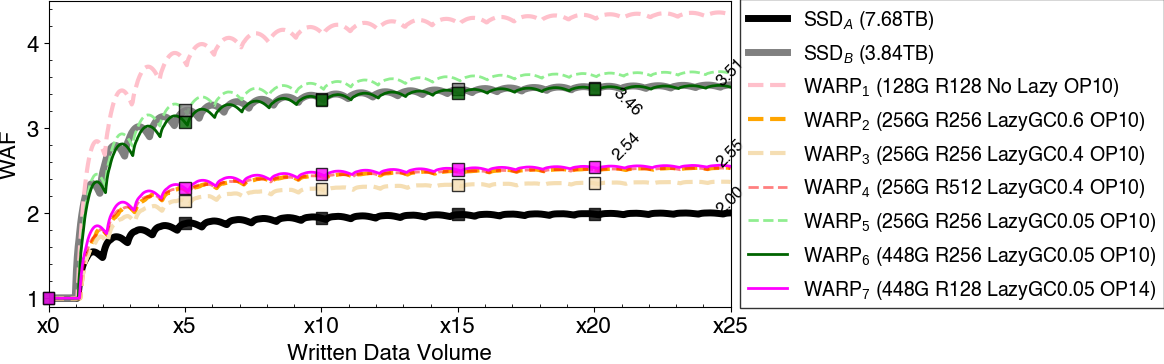

In [9]:
#------------------------------------------------------------#
fig, ax = plt.subplots(1,1, figsize=(12,4))
#------------------------------------------------------------#
ax2=ax
x_cut_lim = 25
hop=5
TEXT_FONT_SIZE = SMALL_SIZE
def x_cut_limit(hbmw_list_TB, waf_list, x_cut_lim=None):
    if x_cut_lim ==None:
        x_cut_lim = 25

    lim=len(hbmw_list_TB)
    for k, hb in enumerate(hbmw_list_TB):
        if hb >= x_cut_lim:
            lim = k
            break
    hbmw_list_TB = hbmw_list_TB[:lim]
    waf_list = waf_list[:lim]

    return [hbmw_list_TB,waf_list]


#------------------------------------------------------------#
waf_list_label = [r'WARP$_{AE}$ new line']
waf_list_color = ['red']
waf_list_bar = []
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./" 
    filename="nvme0_waf_1sec.txt"
    path = data_dir
    
    if (check_file_existence(path, filename) == 0):
        break
        
    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_TB = [ x / 7.68 for x in hbmw_list ]
    ret = x_cut_limit(hbmw_list_TB,waf_list,x_cut_lim)
    hbmw_list_TB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#

    ax2.plot( hbmw_list_TB, waf_list, linewidth=5, marker='o', markersize=1 ,color=waf_list_color[i], label= waf_list_label[i])
    my_waf_text_index = get_waf_by_aligned_hbmw(data_dir, 7.68, filename, x_cut_lim)
    for j, v in enumerate(my_waf_text_index[::hop]):
            if j> 0:
                #ax2.text(j*hop+1.2, v-0.4, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45)
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=waf_list_color[i], alpha=0.8))
v = waf_list[-1]
j = hbmw_list_TB[-1]
ax2.text(j, v+0.001, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45)

#------------------------------------------------------------#


#------------------------------------------------------------#
waf_list_label = [r'SSD$_{A}$ (7.68TB)']
waf_list_color = ['black']
waf_list_bar = []
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    filename="samsung_waf_1min.txt"
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_TB = [ x / 7.68 for x in hbmw_list ]
    ret = x_cut_limit(hbmw_list_TB,waf_list,x_cut_lim)
    hbmw_list_TB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#

    ax2.plot( hbmw_list_TB, waf_list, linewidth=5, marker='o', markersize=1 ,color=waf_list_color[i], label= waf_list_label[i])
    my_waf_text_index = get_waf_by_aligned_hbmw(data_dir, 7.68, filename, x_cut_lim)
    for j, v in enumerate(my_waf_text_index[::hop]):
            if j> 0:
                #ax2.text(j*hop+1.2, v-0.4, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45)
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=waf_list_color[i], alpha=0.8))
v = waf_list[-1]
j = hbmw_list_TB[-1]
ax2.text(j, v+0.001, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45)

#------------------------------------------------------------#


#------------------------------------------------------------#
waf_list_label = [r'SSD$_{B}$ (3.84TB)']
waf_list_color = ['gray']
waf_list_bar = []
hop=5
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    filename="fadu_waf_1min.txt"
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_TB = [ x / 3.84 for x in hbmw_list ]
    ret = x_cut_limit(hbmw_list_TB,waf_list,x_cut_lim)
    hbmw_list_TB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#
    ax2.plot( hbmw_list_TB, waf_list, linewidth=5, color=waf_list_color[i], label= waf_list_label[i])
    my_waf_text_index = get_waf_by_aligned_hbmw(data_dir, 3.84, filename,x_cut_lim)
    for j, v in enumerate(my_waf_text_index[::hop]):
            if j> 0:
                #ax2.text(j*hop+1.2, v+0.2, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45)
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=waf_list_color[i], alpha=0.8))

v = waf_list[-1]
j = hbmw_list_TB[-1]
ax2.text(j, v+0.001, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45)
#------------------------------------------------------------#

#-----------------------BEGIN-----------------------------#
waf_list_label = [r"WARP$_{1}$ (128G R128 No Lazy OP10)"]
waf_list_color = ['pink']
waf_list_bar = []

#--------------------- FIGURE ----------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    filename="femu8_waf_1sec.txt"
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_GB = [ (x*1024)/128 for x in hbmw_list]
    ret = x_cut_limit(hbmw_list_GB,waf_list,x_cut_lim)
    hbmw_list_GB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#
 
    ax2.plot(hbmw_list_GB, waf_list, linewidth=3 , linestyle='--', color=waf_list_color[i], label= waf_list_label[i])


#--------------------------FIN---------------------------#

#-----------------------BEGIN-----------------------------#
waf_list_label = [r"WARP$_{2}$ (256G R256 LazyGC0.6 OP10)"]
waf_list_color = ['orange']
waf_list_bar = []
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    filename="femuXXX_waf_1sec.txt"
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_GB = [ (x*1024)/256 for x in hbmw_list]
    ret = x_cut_limit(hbmw_list_GB,waf_list,x_cut_lim)
    hbmw_list_GB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#
    #ax1.plot( range(0, len(mbmw_list[1:])) , mbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='black', label='Dev')
    # ax1.plot( range(0, len(erase_list[1:])) , erase_list[1:] , linewidth=4, marker='x', markersize=1, color='gray', label='erase', alpha=0.5)
    #ax1.plot( range(0, len(hbmw_list[1:])) , hbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    #ax1.plot( range(0, len(hbmw_list_GB[1:])) , hbmw_list_GB[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    ax2.plot(hbmw_list_GB, waf_list, linewidth=3 , linestyle='--', color=waf_list_color[i], label= waf_list_label[i])
    #ax2.plot( range(0, len(waf_list)), waf_list, linewidth=0.1, marker='o', markersize=1 ,color=waf_list_color[i], label= waf_list_label[i])
    # for j, v in enumerate(waf_list[::100]):
    #     ax1.text(j*100, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    # for j, v in enumerate(waf_list[::1000]):
    #     ax2.text(j*1000, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    #------------------------------------------------------------#
    # hop=5
    # a=0.6
    # my_waf_text_index = get_waf_by_aligned_hbmw(data_dir, 256/1024, filename, x_cut_lim)
    # for j, v in enumerate(my_waf_text_index[::hop]):
    #         if j> 0:
    #             ax2.text(j*hop+1.2, v+0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
    #             ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor='red', alpha=0.8))
#------------------------------------------------------------#


#------------------------------------------------------------#
waf_list_label = [r"WARP$_{3}$ (256G R256 LazyGC0.4 OP10)"]
waf_list_color = ['wheat']
waf_list_bar = []
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    filename="femu_lazy4_waf_1sec.txt"
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_GB = [ (x*1024)/256 for x in hbmw_list]
    ret = x_cut_limit(hbmw_list_GB,waf_list,x_cut_lim)
    hbmw_list_GB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#

    #ax1.plot( range(0, len(mbmw_list[1:])) , mbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='black', label='Dev')
    # ax1.plot( range(0, len(erase_list[1:])) , erase_list[1:] , linewidth=4, marker='x', markersize=1, color='gray', label='erase', alpha=0.5)
    #ax1.plot( range(0, len(hbmw_list[1:])) , hbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    #ax1.plot( range(0, len(hbmw_list_GB[1:])) , hbmw_list_GB[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    ax2.plot(hbmw_list_GB, waf_list, linewidth=3 , linestyle='--' ,color=waf_list_color[i], label= waf_list_label[i])
    #ax2.plot( range(0, len(waf_list)), waf_list, linewidth=0.1, marker='o', markersize=1 ,color=waf_list_color[i], label= waf_list_label[i])
    # for j, v in enumerate(waf_list[::100]):
    #     ax1.text(j*100, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    # for j, v in enumerate(waf_list[::1000]):
    #     ax2.text(j*1000, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    #------------------------------------------------------------#
    hop=5
    a=0.6
    my_waf_text_index = get_waf_by_aligned_hbmw(data_dir, 256/1024, filename, x_cut_lim)
    for j, v in enumerate(my_waf_text_index[::hop]):
            if j> 0:
                #ax2.text(j*hop+1.2, v-0.02, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=waf_list_color[i], alpha=0.8))

#------------------------------------------------------------#
waf_list_label = [r"WARP$_{4}$ (256G R512 LazyGC0.4 OP10)"]
waf_list_color = ['red']
waf_list_bar = []
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    filename="femu_lazy8_waf_1sec.txt"
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_GB = [ (x*1024)/256 for x in hbmw_list]
    ret = x_cut_limit(hbmw_list_GB,waf_list,x_cut_lim)
    hbmw_list_GB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#

    ax2.plot(hbmw_list_GB, waf_list, linewidth=2 , linestyle='--',color=waf_list_color[i], label= waf_list_label[i] , alpha=0.5)
#------------------------------------------------------------#

#------------------------------------------------------------#
#waf_list_label = ["cylon (256G RU256MB LazyGC 0.25 OP10)", "cylon (256G RU256MB LazyGC 0.05 OP10)" ]
#waf_list_color = ['lightgreen', 'b']
waf_list_label = [r"WARP$_{5}$ (256G R256 LazyGC0.05 OP10)"]
waf_list_color = ['lightgreen', 'lightgreen']
filenames = [ "femu256_lazy05_.txt"]
waf_list_bar = []
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    #filename="femu256_lazy05_4.txt"
    filename = filenames[i]
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_GB = [ (x*1024)/256 for x in hbmw_list]
    ret = x_cut_limit(hbmw_list_GB,waf_list,x_cut_lim)
    hbmw_list_GB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#

    #ax1.plot( range(0, len(mbmw_list[1:])) , mbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='black', label='Dev')
    # ax1.plot( range(0, len(erase_list[1:])) , erase_list[1:] , linewidth=4, marker='x', markersize=1, color='gray', label='erase', alpha=0.5)
    #ax1.plot( range(0, len(hbmw_list[1:])) , hbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    #ax1.plot( range(0, len(hbmw_list_GB[1:])) , hbmw_list_GB[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    ax2.plot(hbmw_list_GB, waf_list, linewidth=2 , linestyle='--',color=waf_list_color[i], label= waf_list_label[i])
    #ax2.plot( range(0, len(waf_list)), waf_list, linewidth=0.1, marker='o', markersize=1 ,color=waf_list_color[i], label= waf_list_label[i])
    # for j, v in enumerate(waf_list[::100]):
    #     ax1.text(j*100, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    # for j, v in enumerate(waf_list[::1000]):
    #     ax2.text(j*1000, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
#------------------------------------------------------------#

#------------------------------------------------------------#
#waf_list_label = ["cylon (256G RU256MB LazyGC 0.25 OP10)", "cylon (256G RU256MB LazyGC 0.05 OP10)" ]
#waf_list_color = ['lightgreen', 'b']
waf_list_label = [r"WARP$_{6}$ (448G R256 LazyGC0.05 OP10)", r"WARP$_{7}$ (448G R128 LazyGC0.05 OP14)"]
waf_list_color = ['darkgreen', 'magenta']
filenames = [ 'femu448_lazy05_.txt', 'femu448_lazy05_128M.txt']
waf_list_bar = []
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    #filename="femu256_lazy05_4.txt"
    filename = filenames[i]
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_GB = [ (x*1024)/448 for x in hbmw_list]
    ret = x_cut_limit(hbmw_list_GB,waf_list,x_cut_lim)
    hbmw_list_GB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#

    #ax1.plot( range(0, len(mbmw_list[1:])) , mbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='black', label='Dev')
    # ax1.plot( range(0, len(erase_list[1:])) , erase_list[1:] , linewidth=4, marker='x', markersize=1, color='gray', label='erase', alpha=0.5)
    #ax1.plot( range(0, len(hbmw_list[1:])) , hbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    #ax1.plot( range(0, len(hbmw_list_GB[1:])) , hbmw_list_GB[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    ax2.plot(hbmw_list_GB, waf_list, linewidth=2 , linestyle='-',color=waf_list_color[i], label= waf_list_label[i])
    #ax2.plot( range(0, len(waf_list)), waf_list, linewidth=0.1, marker='o', markersize=1 ,color=waf_list_color[i], label= waf_list_label[i])
    # for j, v in enumerate(waf_list[::100]):
    #     ax1.text(j*100, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    # for j, v in enumerate(waf_list[::1000]):
    #     ax2.text(j*1000, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    my_waf_text_index = get_waf_by_aligned_hbmw(data_dir, 448/1024, filename, x_cut_lim)
    for j, v in enumerate(my_waf_text_index[::hop]):
        rota=45
        a = 0.1
        if i == 0:
            rota= -45
            a = -3*a
        if j> 3:
            ax2.text(j*hop+1.2, v+a, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE , rotation=rota)
        ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=waf_list_color[i], alpha=0.8))
#------------------------------------------------------------#
ax2=ax
#ax.set_title("4K randwrite (uniform)", fontsize=MEDIUM_SIZE)
#fig.text(0.3, +0.05, r'X-axis : $\mathrm{Relative HMW} = \frac{\mathrm{Host\ Media\ Written}}{ Dev. Capacity}$', fontsize=BIGGER_SIZE)
ax2.set_xlabel(r'Written Data Volume', fontsize=MEDIUM_SIZE , fontproperties=helvetica_prop)
ax2.set_ylabel("WAF", fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
ax2.set_xlim([0,25])
#ax2.grid()
#ax2.legend()
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=False, edgecolor='k' ,frameon=True, fontsize=MEDIUM_SIZE-2)
#plt.minorticks_on()
ax.tick_params(axis='x', which='minor', direction='in')
ax.tick_params(axis='y', which='minor', direction='in')
ax.minorticks_on()
ax.set_ylim(0.9,4.5)
#------------------------------------------------------------#
labels = [label.get_text() for label in ax2.get_xticklabels()]
ax2.set_xticklabels([f"x{t}" for t in labels] , fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
for label in ax2.get_yticklabels():
    label.set_fontproperties(helvetica_prop)
    label.set_fontsize(MEDIUM_SIZE)

#------------------------------------------------------------#
fig.tight_layout()

# ------------------- #
isConference=False
if (isConference) :
    save_dir = "/home/inho/git/fast25-cylon-fdp/v1/F/observ/"
    fig_name = "val-1stream"
    plt.savefig("{0}{1}.eps".format(save_dir,fig_name)  ) #, dpi=100)
    plt.savefig("{0}{1}.pdf".format(save_dir,fig_name)  ) #, dpi=100)
    plt.savefig("{0}{1}.png".format(save_dir,fig_name)  ) #, dpi=100)
    plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name) ) #, dpi=100)
# ------------------- #


[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/quick/zipf_2.2/nofdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/quick/zipf_2.2/fdp_share/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/quick/zipf_2.2/fdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/quick/zipf_1.2/nofdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/quick/zipf_1.2/fdp_share/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/quick/zipf_1.2/fdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/quick/zoned/nofdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/quick/zoned/fdp_share/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/quick/zoned/fdp/samsung_waf_1sec.txt
[Check!] /data/inho/nv

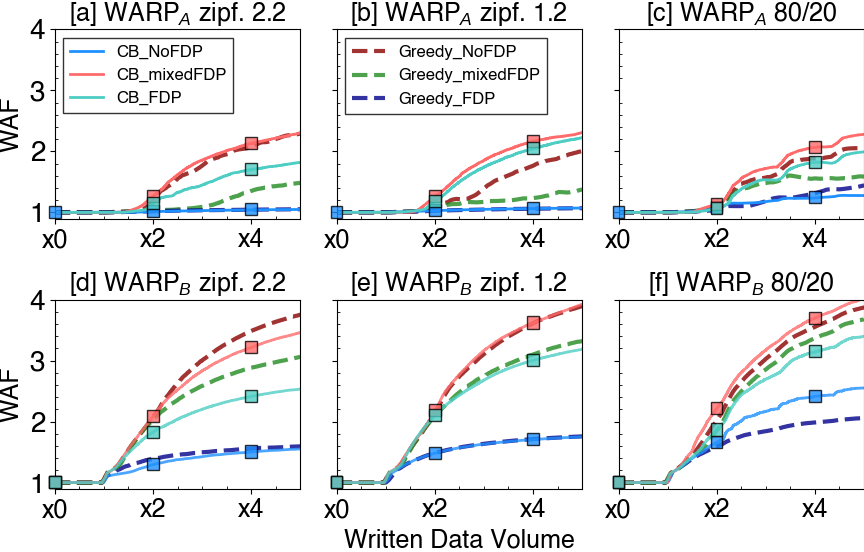

In [7]:
#------------------------------------------------------------#
fig, ax = plt.subplots(2,3, figsize=(9,6), sharey=True)
plt.style.use('tableau-colorblind10')
#------------------------------------------------------------#
greedy_colors = {
    "fdp_share/":"#228B22",                    # Money green – deep and rich
    "nofdp/":"#8B0000",              # Power red – intense and dominant
    "nofdp_R256OP20/":"#D4AF37",              # Power red – intense and dominant
    #"#D4AF37",          # Greedy gold – luxurious, eye-catching
    "fdp/":"#00008B"  # DarkBlue – bold, assertive, and wealth-associated
}
cost_benefit_colors = {
    "fdp_share/":"#4ECDC4",  # Benefit – calm teal (gain, positive)
    "nofdp/":"#FF6B6B",  # Cost – soft red (warning, loss)
    #"#FFE66D",  # Neutral – yellow (decision, caution, balance point)
    "fdp/":"#1E90FF"                 # Dodger Blue – vivid, clear, optimistic
}
#------------------------------------------------------------#

#fdev="Samsung-FDP-PM9D3a-MZWL67T6HBLC-7.68TB-PCIeGen5/"
#fdev=
#util = ['{0}p/'.format(x) for x in np.arange(90,170,10) ]
#workload= ['fileserver' , 'oltp', 'varmail']
#workload= ['PI/zipf_1.2/', 'PI/zoned/']
workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['nofdp/','fdp_share/','fdp/']
data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/quick/"
#util = ['{0}/'.format(x*100) for x in np.arange(1,6) ]
#bbss = ['{0}K/'.format(4**x) for x in np.arange(1,5)]
#print(bbss)
TEXT_FONT_SIZE = 24

# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        x_cut_lim = 7
        hbmw_list_TB = [ x /dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)
        #waf_log_to_waf_lists(data_dir+up+bs,filename )
        #    return [waf_list, hbmw_list , mbmw_list, erase_list]

        #ax2 = ax[i//2][i%2].twinx()
        ax2 = ax[0][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=3, linestyle='--', alpha=0.8, label="Greedy_"+sdir.replace('/','').replace('_',' '), color=greedy_colors[sdir])
#------------------------------------------------------------#

workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['fdp/', 'nofdp/', 'fdp_share/']
data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCcb/quick/"
#print(bbss)
# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        x_cut_lim = 5
        hbmw_list_TB = [ x/dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)
        #waf_log_to_waf_lists(data_dir+up+bs,filename )
        #    return [waf_list, hbmw_list , mbmw_list, erase_list]
        ax2 = ax[0][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=2,  label="CB_"+sdir.replace('/','').replace('_',' '), color=cost_benefit_colors[sdir])
        #ax2.set_title("{0}".format(w.replace('/', ' ')), fontsize=BIGGER_SIZE)

        hop=2
        a=0.8
        my_waf_text_index = get_waf_by_aligned_hbmw(data_dir+w+sdir, dev_cap, filename, x_cut_lim)

        if (re.match(sdir,"nofdp/") ) :
            #ax2.plot(range(0,len(waf_list)), waf_list, linewidth=0.1, color='red', marker='o', markersize=1, label=t_labels[j], alpha=0.5)
            #ax2.plot(hbmw_list_TB, waf_list, linewidth=1, marker='o', markersize=1, label=t_labels[j], alpha=0.5, color='red')
            for k, v in enumerate(my_waf_text_index[::hop]):
                if k>0:
                    ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
        
        elif (re.match(sdir,"fdp/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                # #Text
                # ax2.text(k*hop+a, v-0.05, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                # #Box
                # ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict( fc=cost_benefit_colors[sdir], ec="k", alpha=0.8))

        elif (re.match(sdir,"fdp_share/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                if k>0 :
                    #Text
                    #ax2.text(k*hop+a+0.1, v-0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                    #Box
                    ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))

#------------------------------------------------------------#
greedy_colors = {
    "fdp_share/":"#228B22",                    # Money green – deep and rich
    "nofdp/":"#8B0000",              # Power red – intense and dominant
    #"#D4AF37",          # Greedy gold – luxurious, eye-catching
    "fdp/":"#00008B"  # DarkBlue – bold, assertive, and wealth-associated
}
cost_benefit_colors = {
    "fdp_share/":"#4ECDC4",  # Benefit – calm teal (gain, positive)
    "nofdp/":"#FF6B6B",  # Cost – soft red (warning, loss)
    #"#FFE66D",  # Neutral – yellow (decision, caution, balance point)
    "fdp/":"#1E90FF"                 # Dodger Blue – vivid, clear, optimistic
}
workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['fdp/', 'nofdp/', 'fdp_share/']
data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/"
TEXT_FONT_SIZE = 24

# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        hbmw_list_TB = [ x /dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)

        ax2 = ax[1][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=3, linestyle='--', alpha=0.8, label="Greedy_"+sdir.replace('/','').replace('_',' '), color=greedy_colors[sdir])
        ax2.set_title("{0}".format(w.replace('/', ' ')), fontsize=BIGGER_SIZE)

        hop=2
        a=0.8
        my_waf_text_index = get_waf_by_aligned_hbmw(data_dir+w+sdir, dev_cap, filename, x_cut_lim)
#------------------------------------------------------------#
workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['fdp/', 'nofdp/', 'fdp_share/']
data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCcb/"
#util = ['{0}/'.format(x*100) for x in np.arange(1,6) ]
#bbss = ['{0}K/'.format(4**x) for x in np.arange(1,5)]
#print(bbss)
# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        hbmw_list_TB = [ x/dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)
        #waf_log_to_waf_lists(data_dir+up+bs,filename )
        #    return [waf_list, hbmw_list , mbmw_list, erase_list]
        ax2 = ax[1][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=2,alpha=0.8, label="CB_"+sdir.replace('/','').replace('_',' '), color=cost_benefit_colors[sdir])

        my_waf_text_index = get_waf_by_aligned_hbmw(data_dir+w+sdir, dev_cap, filename, x_cut_lim)
        if (re.match(sdir,"nofdp/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
        
        elif (re.match(sdir,"fdp/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                #Text
                # if k> 0:
                #     ax2.text(k*hop+a+0.1, v-0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                #Box
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
                #ax2.text(k*hop, v, " " , ha="center",  fontsize=5, bbox=dict(boxstyle='circle', fc=cost_benefit_colors[sdir], ec="k", alpha=0.8))

        elif (re.match(sdir,"fdp_share/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                #Text
                # ax2.text(k*hop+a+0.1, v-0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                #Box
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))

#------------------------------------------------------------#
MEDIUM_PLUS_SIZE=MEDIUM_SIZE+2

# Collect handles and labels from the full figure
handles, labels = ax[0][0].get_legend_handles_labels()

# Split into two groups (first 3 and last 3, adjust as needed)
handles1, labels1 = handles[:3], labels[:3]
handles2, labels2 = handles[3:], labels[3:]

# Rename labels (example)
labels1 = ["Greedy_NoFDP", "Greedy_mixedFDP", "Greedy_FDP"]
labels2 = ["CB_NoFDP", "CB_mixedFDP", "CB_FDP"]

# Place legends in different axes
ax[0][0].legend(handles2, labels2, loc="upper left", frameon=True, prop=helvetica_prop, fontsize=MEDIUM_SIZE , edgecolor='k' , fancybox=False)
ax[0][1].legend(handles1, labels1, loc="upper left", frameon=True, prop=helvetica_prop, fontsize=MEDIUM_SIZE , edgecolor='k' , fancybox=False)


ax[0][0].set_ylabel("WAF", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][0].set_ylabel("WAF", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

#fig.text(0.34, 0.01,  r'Written Data Volume', fontsize=MEDIUM_SIZE+2)
ax[1][1].set_xlabel(r'Written Data Volume', fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

ax[0][0].set_title(r"[a] WARP$_{A}$ zipf. 2.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[0][1].set_title(r"[b] WARP$_{A}$ zipf. 1.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[0][2].set_title(r"[c] WARP$_{A}$ 80/20", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][0].set_title(r"[d] WARP$_{B}$ zipf. 2.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][1].set_title(r"[e] WARP$_{B}$ zipf. 1.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][2].set_title(r"[f] WARP$_{B}$ 80/20", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)


for i in range(2):
    for j in range(3):
        ax2 = ax[i][j]
        ax2.tick_params(axis='x', which='minor', direction='in')
        ax2.tick_params(axis='y', which='minor', direction='in')
        ax2.minorticks_on()
        ax2.set_xlim([0,5])
        ax2.set_ylim([0.9 , 4.0])
        ax2.set_xticks([0,2,4])
        labels = [label.get_text() for label in ax2.get_xticklabels()]
        ax2.set_xticklabels([f"x{t}" for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

ax[0][0].set_yticks([1, 2, 3, 4])
ax[1][0].set_yticks([1, 2, 3, 4])


fig.tight_layout(rect=[0, 0.02, 1, 1])

#------------------------#
isConference = False
if (isConference) :
    save_dir = "/home/inho/git/fast25-cylon-fdp/v1/F/observ/"
    fig_name = "3stream_WARP"
    plt.savefig("{0}{1}.eps".format(save_dir,fig_name) ) #, dpi=100)
    plt.savefig("{0}{1}.pdf".format(save_dir,fig_name) ) #, dpi=100)
    plt.savefig("{0}{1}.png".format(save_dir,fig_name) ) #, dpi=100)
    plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name)) #, dpi=100)
#------------------------#
plt.show()


[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_2.2/nofdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_2.2/fdp_share/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_2.2/fdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_1.2/nofdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_1.2/fdp_share/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_1.2/fdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zoned/nofdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zoned/fdp_share/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zoned/fdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/fdp/samsung_waf_1sec.txt


./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/fdp/
[Check!] ./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/fdp/samsung_waf_1sec.txt
hbmw_list_TB 51.360086117471965
[Check!] ./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/nofdp/samsung_waf_1sec.txt
./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/nofdp/
[Check!] ./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/nofdp/samsung_waf_1sec.txt
hbmw_list_TB 10.012568507875715
[Check!] ./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/fdp_share/samsung_waf_1sec.txt
./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/fdp_share/
[Check!] ./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/fdp_share/samsung_waf_1sec.txt
hbmw_list_TB 32.6799122946603
[Check!] ./archive/result-FIO/cylon224-PI/GCcb/zipf_1.2/fdp/samsung_waf_1sec.txt
./archive/result-FIO/cylon224-PI/GCcb/zipf_1.2/fdp/
[Check!] ./archive/result-FIO/cylon224-PI/GCcb/zipf_1.2/fdp/samsung_waf_1sec.txt
hbmw_list_TB 7.89300583090101
[Check!] ./archive/result-FIO/cylon224-PI/GCcb/zipf_1.2/nofdp/samsung_waf_1se

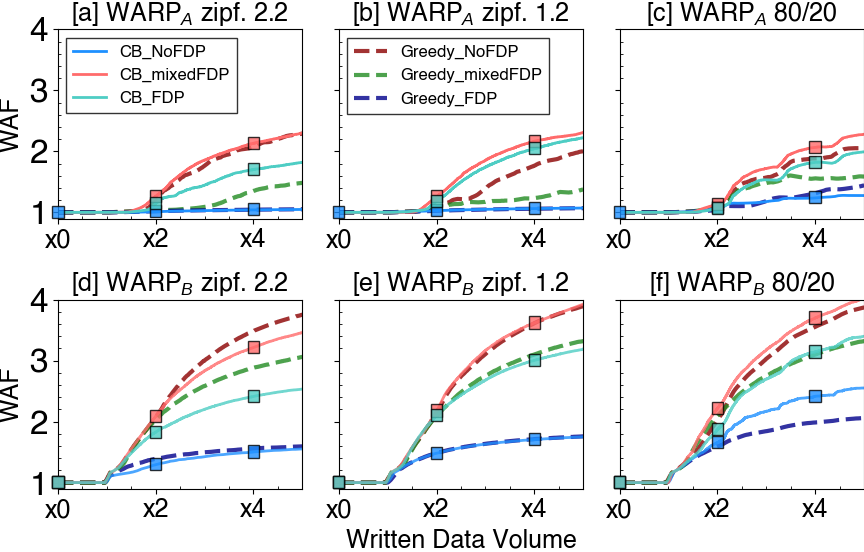

In [7]:
#------------------------------------------------------------#
fig, ax = plt.subplots(2,3, figsize=(9,6), sharey=True)
plt.style.use('tableau-colorblind10')
#------------------------------------------------------------#
greedy_colors = {
    "fdp_share/":"#228B22",                    # Money green – deep and rich
    "nofdp/":"#8B0000",              # Power red – intense and dominant
    "nofdp_R256OP20/":"#D4AF37",              # Power red – intense and dominant
    #"#D4AF37",          # Greedy gold – luxurious, eye-catching
    "fdp/":"#00008B"  # DarkBlue – bold, assertive, and wealth-associated
}
cost_benefit_colors = {
    "fdp_share/":"#4ECDC4",  # Benefit – calm teal (gain, positive)
    "nofdp/":"#FF6B6B",  # Cost – soft red (warning, loss)
    #"#FFE66D",  # Neutral – yellow (decision, caution, balance point)
    "fdp/":"#1E90FF"                 # Dodger Blue – vivid, clear, optimistic
}
#------------------------------------------------------------#

#fdev="Samsung-FDP-PM9D3a-MZWL67T6HBLC-7.68TB-PCIeGen5/"
#fdev=
#util = ['{0}p/'.format(x) for x in np.arange(90,170,10) ]
#workload= ['fileserver' , 'oltp', 'varmail']
#workload= ['PI/zipf_1.2/', 'PI/zoned/']
workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['nofdp/','fdp_share/','fdp/']
#data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/quick/"
data_dir = "./archive/result-FIO/cylon224-PI/GCe/3stream/"
#util = ['{0}/'.format(x*100) for x in np.arange(1,6) ]
#bbss = ['{0}K/'.format(4**x) for x in np.arange(1,5)]
#print(bbss)
TEXT_FONT_SIZE = 24

# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        x_cut_lim = 7
        hbmw_list_TB = [ x /dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)
        #waf_log_to_waf_lists(data_dir+up+bs,filename )
        #    return [waf_list, hbmw_list , mbmw_list, erase_list]

        #ax2 = ax[i//2][i%2].twinx()
        ax2 = ax[0][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=3, linestyle='--', alpha=0.8, label="Greedy_"+sdir.replace('/','').replace('_',' '), color=greedy_colors[sdir])
#------------------------------------------------------------#

workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['fdp/', 'nofdp/', 'fdp_share/']
#data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCcb/quick/"
data_dir = "./archive/result-FIO/cylon224-PI/GCcb/"
#print(bbss)
# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        x_cut_lim = 5
        hbmw_list_TB = [ x/dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)
        #waf_log_to_waf_lists(data_dir+up+bs,filename )
        #    return [waf_list, hbmw_list , mbmw_list, erase_list]
        ax2 = ax[0][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=2,  label="CB_"+sdir.replace('/','').replace('_',' '), color=cost_benefit_colors[sdir])
        #ax2.set_title("{0}".format(w.replace('/', ' ')), fontsize=BIGGER_SIZE)

        hop=2
        a=0.8
        my_waf_text_index = get_waf_by_aligned_hbmw(data_dir+w+sdir, dev_cap, filename, x_cut_lim)

        if (re.match(sdir,"nofdp/") ) :
            #ax2.plot(range(0,len(waf_list)), waf_list, linewidth=0.1, color='red', marker='o', markersize=1, label=t_labels[j], alpha=0.5)
            #ax2.plot(hbmw_list_TB, waf_list, linewidth=1, marker='o', markersize=1, label=t_labels[j], alpha=0.5, color='red')
            for k, v in enumerate(my_waf_text_index[::hop]):
                if k>0:
                    ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
        
        elif (re.match(sdir,"fdp/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                # #Text
                # ax2.text(k*hop+a, v-0.05, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                # #Box
                # ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict( fc=cost_benefit_colors[sdir], ec="k", alpha=0.8))

        elif (re.match(sdir,"fdp_share/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                if k>0 :
                    #Text
                    #ax2.text(k*hop+a+0.1, v-0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                    #Box
                    ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))

#------------------------------------------------------------#
greedy_colors = {
    "fdp_share/":"#228B22",                    # Money green – deep and rich
    "nofdp/":"#8B0000",              # Power red – intense and dominant
    #"#D4AF37",          # Greedy gold – luxurious, eye-catching
    "fdp/":"#00008B"  # DarkBlue – bold, assertive, and wealth-associated
}
cost_benefit_colors = {
    "fdp_share/":"#4ECDC4",  # Benefit – calm teal (gain, positive)
    "nofdp/":"#FF6B6B",  # Cost – soft red (warning, loss)
    #"#FFE66D",  # Neutral – yellow (decision, caution, balance point)
    "fdp/":"#1E90FF"                 # Dodger Blue – vivid, clear, optimistic
}
workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['fdp/', 'nofdp/', 'fdp_share/']
#data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/"
data_dir ="./archive/result-FIO/warpb-cylon224-PI/GCe/3stream/"

TEXT_FONT_SIZE = 24

# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        hbmw_list_TB = [ x /dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)

        ax2 = ax[1][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=3, linestyle='--', alpha=0.8, label="Greedy_"+sdir.replace('/','').replace('_',' '), color=greedy_colors[sdir])
        ax2.set_title("{0}".format(w.replace('/', ' ')), fontsize=BIGGER_SIZE)

        hop=2
        a=0.8
        my_waf_text_index = get_waf_by_aligned_hbmw(data_dir+w+sdir, dev_cap, filename, x_cut_lim)
#------------------------------------------------------------#
workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['fdp/', 'nofdp/', 'fdp_share/']
#data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCcb/"
data_dir ="./archive/result-FIO/warpb-cylon224-PI/GCcb/3stream/"
#util = ['{0}/'.format(x*100) for x in np.arange(1,6) ]
#bbss = ['{0}K/'.format(4**x) for x in np.arange(1,5)]
#print(bbss)
# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        hbmw_list_TB = [ x/dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)
        #waf_log_to_waf_lists(data_dir+up+bs,filename )
        #    return [waf_list, hbmw_list , mbmw_list, erase_list]
        ax2 = ax[1][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=2,alpha=0.8, label="CB_"+sdir.replace('/','').replace('_',' '), color=cost_benefit_colors[sdir])

        my_waf_text_index = get_waf_by_aligned_hbmw(data_dir+w+sdir, dev_cap, filename, x_cut_lim)
        if (re.match(sdir,"nofdp/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
        
        elif (re.match(sdir,"fdp/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                #Text
                # if k> 0:
                #     ax2.text(k*hop+a+0.1, v-0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                #Box
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
                #ax2.text(k*hop, v, " " , ha="center",  fontsize=5, bbox=dict(boxstyle='circle', fc=cost_benefit_colors[sdir], ec="k", alpha=0.8))

        elif (re.match(sdir,"fdp_share/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                #Text
                # ax2.text(k*hop+a+0.1, v-0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                #Box
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))

#------------------------------------------------------------#
MEDIUM_PLUS_SIZE=MEDIUM_SIZE+2

# Collect handles and labels from the full figure
handles, labels = ax[0][0].get_legend_handles_labels()

# Split into two groups (first 3 and last 3, adjust as needed)
handles1, labels1 = handles[:3], labels[:3]
handles2, labels2 = handles[3:], labels[3:]

# Rename labels (example)
labels1 = ["Greedy_NoFDP", "Greedy_mixedFDP", "Greedy_FDP"]
labels2 = ["CB_NoFDP", "CB_mixedFDP", "CB_FDP"]

# Place legends in different axes
ax[0][0].legend(handles2, labels2, loc="upper left", frameon=True, prop=helvetica_prop, fontsize=MEDIUM_SIZE , edgecolor='k' , fancybox=False)
ax[0][1].legend(handles1, labels1, loc="upper left", frameon=True, prop=helvetica_prop, fontsize=MEDIUM_SIZE , edgecolor='k' , fancybox=False)


ax[0][0].set_ylabel("WAF", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][0].set_ylabel("WAF", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

#fig.text(0.34, 0.01,  r'Written Data Volume', fontsize=MEDIUM_SIZE+2)
ax[1][1].set_xlabel(r'Written Data Volume', fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

ax[0][0].set_title(r"[a] WARP$_{A}$ zipf. 2.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[0][1].set_title(r"[b] WARP$_{A}$ zipf. 1.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[0][2].set_title(r"[c] WARP$_{A}$ 80/20", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][0].set_title(r"[d] WARP$_{B}$ zipf. 2.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][1].set_title(r"[e] WARP$_{B}$ zipf. 1.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][2].set_title(r"[f] WARP$_{B}$ 80/20", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)


for i in range(2):
    for j in range(3):
        ax2 = ax[i][j]
        ax2.tick_params(axis='x', which='minor', direction='in')
        ax2.tick_params(axis='y', which='minor', direction='in')
        ax2.minorticks_on()
        ax2.set_xlim([0,5])
        ax2.set_ylim([0.9 , 4.0])
        ax2.set_xticks([0,2,4])
        labels = [label.get_text() for label in ax2.get_xticklabels()]
        ax2.set_xticklabels([f"x{t}" for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

ax[0][0].set_yticks([1, 2, 3, 4])
ax[1][0].set_yticks([1, 2, 3, 4])


fig.tight_layout(rect=[0, 0.02, 1, 1])

#------------------------#
isConference = False
if (isConference) :
    save_dir = "./archive"
    fig_name = "3stream_WARP"
    plt.savefig("{0}{1}.eps".format(save_dir,fig_name) ) #, dpi=100)
    plt.savefig("{0}{1}.pdf".format(save_dir,fig_name) ) #, dpi=100)
    plt.savefig("{0}{1}.png".format(save_dir,fig_name) ) #, dpi=100)
    plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name)) #, dpi=100)
#------------------------#
plt.show()


/home/inho/git/CacheLib/inho-run-cachelib/fdp_vs_nofdp/samsung/nofdp/kvcache202206/soc4/kvcache202206_soc4.log
/home/inho/git/CacheLib/inho-run-cachelib/fdp_vs_nofdp/samsung/nofdp/kvcache202206/soc20/kvcache202206_soc20.log
/home/inho/git/CacheLib/inho-run-cachelib/fdp_vs_nofdp/samsung/nofdp/kvcache202206/soc40/kvcache202206_soc40.log
/home/inho/git/CacheLib/inho-run-cachelib/fdp_vs_nofdp/samsung/fdp/kvcache202206/soc4/kvcache202206_soc4.log
/home/inho/git/CacheLib/inho-run-cachelib/fdp_vs_nofdp/samsung/fdp/kvcache202206/soc20/kvcache202206_soc20.log
/home/inho/git/CacheLib/inho-run-cachelib/fdp_vs_nofdp/samsung/fdp/kvcache202206/soc40/kvcache202206_soc40.log


/tmp/ipykernel_2262574/4105684835.py:202: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([t for t in labels], fontsize=BIGGER_SIZE)


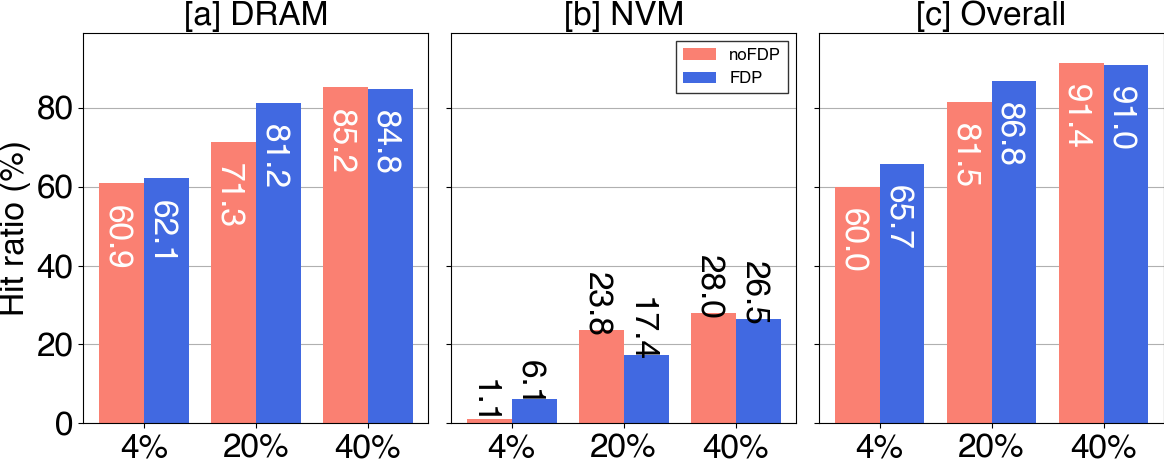

In [5]:
#------------------------------------------------------------#
fig, ax = plt.subplots(1,3, figsize=(12,5), sharey=True)
#------------------------------------------------------------#
result_path = "/home/inho/git/CacheLib/inho-run-cachelib/fdp_vs_nofdp/samsung/nofdp/"
result_path_common = "/home/inho/git/CacheLib/inho-run-cachelib/fdp_vs_nofdp/samsung/"
target_devs_dirs = [ "nofdp/", "fdp/" ]
label = [ "4%", "20%", "40%"]
log_dirs = [  "kvcache202206/soc4/" , "kvcache202206/soc20/" , "kvcache202206/soc40/" ]
target_log_files = [ "kvcache202206_soc4.log", "kvcache202206_soc20.log", "kvcache202206_soc40.log"]
column_label = [ "noFDP", "FDP"]
color_label = [ "salmon", "royalblue"]
hit_re = re.compile(r'.+Hit Ratio*')
nvm_hit_re = re.compile(r'NVM Hit Ratio*')
dram_hit_re = re.compile(r'RAM Hit Ratio*')
bar_width = 0.4
ax[0].set_axisbelow(True)
ax[1].set_axisbelow(True)
ax[2].set_axisbelow(True)
#------------------------------------------------------------#
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#print (data_dir+filename)
this_dev_cap_TB = 7.68
x_cut_lim = 50
#x_cut_lim = 5

TEXT_FONT_SIZE=SMALL_SIZE

def first_available_font(candidates):
    available = {f.name for f in fm.fontManager.ttflist}
    for name in candidates:
        if name in available:
            return name
    return None

# Prefer Arial; otherwise use Liberation Sans, then Lato, then DejaVu Sans
math_family = first_available_font(['Arial', 'Liberation Sans', 'Lato', 'DejaVu Sans'])
if math_family is None:
    print("WTF DejaVu Sans")
    math_family = 'DejaVu Sans'  # last-resort

# Make mathtext use the chosen family (instead of DejaVu fallback)
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = math_family
mpl.rcParams['mathtext.it'] = f'{math_family}:italic'
mpl.rcParams['mathtext.bf'] = f'{math_family}:bold'

MEDIUM_PLUS_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_PLUS_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_PLUS_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

# Try to use Helvetica or fallback to similar fonts
# Step 1: Provide full path to Helvetica.ttc
# Load Helvetica.ttc manually
font_path = "/home/inho/.fonts/Helvetica.ttc"
helvetica_prop = fm.FontProperties(fname=font_path)
# Step 1: Manually load Helvetica.ttc
font_path = '/home/inho/.fonts/Helvetica.ttc'
helvetica_font = fm.FontProperties(fname=font_path)
font_name = helvetica_font.get_name()

# Step 2: Add to font manager cache
fm.fontManager.addfont(font_path)

# Step 3: Now set as default
mpl.rcParams['font.family'] = font_name
mpl.rcParams['font.family'] = helvetica_prop.get_name()


#------------------------------------------------------------#

# ----------------------- Regular Expr. ------------------------- #

output_re=re.compile(r'.*_output')
hbmw_re=re.compile(r'.*(HBMW)')
mbmw_re=re.compile(r'.*(MBMW)')
mbe_mre=re.compile(r'.*(MBE)')
mbe_re=re.compile(r'.*(MBE)')
num_re=re.compile(r'[0-9]+')
num_float_re=re.compile(r'[0-9]+\.[0-9]+')

total_bw_re=re.compile(r'.*READ: bw=')
nvme_iostat_re=re.compile(r'nvme1n1')
#write_bw_re=re.compile()

#------------------------------------------------------------#

hit_list={
    "4%":[],
    "20%":[],
    "40%":[]
}
dram_hit_list={
    "4%":[],
    "20%":[],
    "40%":[]
}
nvm_hit_list={
    "4%":[],
    "20%":[],
    "40%":[]
}
#------------------------------------------------------------#
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[2].yaxis.grid()
for d, dev_dir in enumerate(target_devs_dirs):
    result_path = result_path_common+dev_dir
    hit_list={
    "4%":[],
    "20%":[],
    "40%":[]
    }
    dram_hit_list={
        "4%":[],
        "20%":[],
        "40%":[]
    }
    nvm_hit_list={
        "4%":[],
        "20%":[],
        "40%":[]
    }
    for i, log in enumerate(target_log_files) :

        print(result_path+log_dirs[i]+log)
        f = open(result_path+log_dirs[i]+log, 'r')
        Lines = f.readlines()

        for line in Lines:
            line = ''.join(line).strip().replace(",", '')
            if dram_hit_re.match(line):
                #print(line, num_float_re.findall(line))
                dram_hit_list[label[i]].append( float(num_float_re.findall(line)[0]) )

            elif nvm_hit_re.match(line):
                nvm_hit_list[label[i]].append( float(num_float_re.findall(line)[0]) )
            
            elif hit_re.match(line):
                # print(line, num_float_re.findall(line))
                if( len (num_float_re.findall(line)) > 0):
                    hit_list[label[i]].append( float(num_float_re.findall(line)[1]) )

        #ax1 = ax[0]
        #ax1.bar( dram_hit_list[-1], label=label[i] )
                    
        ax1 = ax[0]
        ax2 = ax[1]
        ax3 = ax[2]
    
    for keys in dram_hit_list.keys():
        dram_hit_list[keys] = dram_hit_list[keys][-100:]
        nvm_hit_list[keys] = nvm_hit_list[keys][-100:]
        hit_list[keys] = hit_list[keys][-100:]
    
    #dram_mean_list = [ np.mean(x) for x in dram_hit_list.values()]
    pos = np.arange(len(dram_hit_list.keys()))  # Positions for the bars

    ax1.bar( pos - (((-1)**d)*bar_width/2) , [ np.mean(x) for x in dram_hit_list.values()] , width=bar_width, color=color_label[d], label=column_label[d] )
    ax1.set_title("[a] DRAM", fontproperties=helvetica_prop,fontsize=BIGGER_SIZE)
    ax2.bar( pos - (((-1)**d)*bar_width/2) , [ np.mean(x) for x in nvm_hit_list.values() ], width=bar_width, color=color_label[d], label=column_label[d])
    ax2.set_title("[b] NVM", fontproperties=helvetica_prop,fontsize=BIGGER_SIZE)
    ax3.bar( pos - (((-1)**d)*bar_width/2) , [np.mean(x) for x in hit_list.values()], width=bar_width, color=color_label[d], label=column_label[d])
    ax3.set_title("[c] Overall", fontproperties=helvetica_prop,fontsize=BIGGER_SIZE)

    for j, v in enumerate(dram_hit_list.values()):
        mean= np.mean(v)
        ax1.text(j-(((-1)**d)*bar_width/2)-0.05, mean-20.1, "%.1f" %mean, ha="center", fontproperties=helvetica_prop,fontsize=BIGGER_SIZE, rotation=-90, color='white')

    for j, v in enumerate(nvm_hit_list.values()):
        mean= np.mean(v)
        ax2.text(j-(((-1)**d)*bar_width/2)-0.05, mean+0.01, "%.1f" %mean, ha="center", fontproperties=helvetica_prop,fontsize=BIGGER_SIZE, rotation=-90)

    for j, v in enumerate(hit_list.values()):
        mean= np.mean(v)
        ax3.text(j-(((-1)**d)*bar_width/2)-0.05, mean-20.01, "%.1f" %mean, ha="center", fontproperties=helvetica_prop,fontsize=BIGGER_SIZE, rotation=-90, color='white')

ax1.set_ylim([0,99])
ax2.set_ylim([0,99])
ax3.set_ylim([0,99])

ax2.legend(prop=helvetica_prop, fontsize=BIGGER_SIZE+4, fancybox=False, edgecolor='k')
ax1.set_xticks(pos, label, fontsize=BIGGER_SIZE)
ax2.set_xticks(pos, label, fontsize=BIGGER_SIZE)
ax3.set_xticks(pos, label, fontsize=BIGGER_SIZE)

ax1.set_ylabel("Hit ratio (%)",fontproperties=helvetica_prop, fontsize=BIGGER_SIZE)

# ------------------- #

ax2 = ax[0]
#ax2.set_xticks([0,2,4])
labels = [label.get_text() for label in ax2.get_yticklabels()]
ax2.set_yticklabels([t for t in labels], fontsize=BIGGER_SIZE)

for label in ax1.get_yticklabels():
    label.set_fontproperties(helvetica_prop)
    label.set_fontsize(BIGGER_SIZE)
for label in ax2.get_yticklabels():
    label.set_fontproperties(helvetica_prop)
    label.set_fontsize(BIGGER_SIZE)
for label in ax3.get_yticklabels():
    label.set_fontproperties(helvetica_prop)
    label.set_fontsize(BIGGER_SIZE)



# ------------------- #


#fig.text(0.3, 0.05, r'X-axis: $\mathrm{rHMW} = \frac{\mathrm{Host\ Media\ Written(TiB)}}{ Dev. Cap.(=7.68\ \mathrm{TiB})}$', fontsize=BIGGER_SIZE)
#fig.text(0.05, 0.05, r'CacheLib BigHash engine capacity setting(4/20/40%, respectively)', fontsize=BIGGER_SIZE)
fig.tight_layout(rect=[0, 0, 1, 1])

# ------------------- #
if isConference:
   save_dir = "/home/inho/git/fast25-cylon-fdp/v0/F/observ/"
   fig_name = "hit_cachelib_Samsung"
   plt.savefig("{0}{1}.eps".format(save_dir,fig_name))#  , dpi=400)
   plt.savefig("{0}{1}.pdf".format(save_dir,fig_name))#  , dpi=400)
   plt.savefig("{0}{1}.png".format(save_dir,fig_name))#  , dpi=400)
   plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name))# , dpi=400)
# ------------------- #


[Check!] ./archive/result-Cachelib/cylon/RU256OP10-small/soc40/nofdp/femu_waf_1min.txt
./archive/result-Cachelib/cylon/RU256OP10-small/soc40/nofdp/
[Check!] ./archive/result-Cachelib/cylon/RU256OP10-small/soc40/nofdp/femu_waf_1min.txt
hbmw_list_TB 3.5557521070752824
[Check!] ./archive/result-Cachelib/cylon/RU256OP10-small/soc40/fdp/femu_waf_1min.txt
./archive/result-Cachelib/cylon/RU256OP10-small/soc40/fdp/
[Check!] ./archive/result-Cachelib/cylon/RU256OP10-small/soc40/fdp/femu_waf_1min.txt
hbmw_list_TB 4.709869793483189
[Check!] ./archive/result-Cachelib/cylon/RU256OP10-small/soc40/fdp-opt/femu_waf_1min.txt
./archive/result-Cachelib/cylon/RU256OP10-small/soc40/fdp-opt/
[Check!] ./archive/result-Cachelib/cylon/RU256OP10-small/soc40/fdp-opt/femu_waf_1min.txt
hbmw_list_TB 5.338277237755912


/tmp/ipykernel_2332358/4168750601.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"x{t}" for t in labels], fontproperties=helvetica_prop,fontsize=MEDIUM_SIZE)


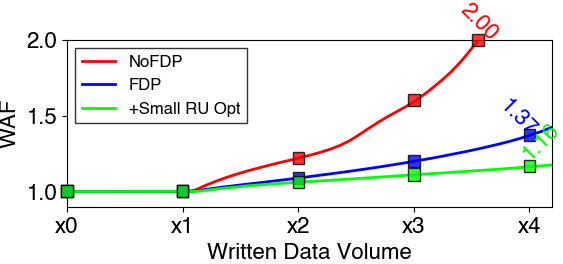

In [17]:
#------------------------------------------------------------#
fig, ax = plt.subplots(1,1, figsize=(6,3))
#------------------------------------------------------------#
#------------------------------------------------------------#
def get_waf_by_aligned_hbmw(data_dir:str, scale:float, filename=None, x_cut=None):
    waf_text_index = []
    try :
        print(data_dir)
        #d = output_to_dictionary(data_dir)
        #file1 = open(data_dir, 'r')
        #Lines = file1.readlines()
        if filename == None : 
            filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir,filename)
        info_list = waf_log_to_waf_lists(data_dir,filename)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        #mbmw_list= info_list[2] 
        #erase_list= info_list[3] 
        hbmw_list_TB = [ x / scale for x in hbmw_list]
        print("hbmw_list_TB", hbmw_list_TB[-1])
        #ax_xdata.append(d.keys())
        #ax_ydata.append([np.mean(x) for x in d.values()])
        cnt=0
        waf_text_index.append( waf_list[0] )
        local_waf_index=[ ]
        next_fill_index=0
        for i,hb in enumerate(hbmw_list_TB) :
            if hb > (next_fill_index) + 0.9 and hb < (next_fill_index+1) + 0.1 : 
                #print(waf_list[i], i, hb)
                cnt+=1
                local_waf_index.append(waf_list[i])
                continue
            else:
                if cnt >= 1:
                    #print (local_waf_index, next_fill_index+1)
                    waf_text_index.append( round(np.mean(local_waf_index),4) )
                    cnt=0
                    local_waf_index=[ ]
                    next_fill_index += 1
            
    except FileNotFoundError:
        print(" [FILE NOT FOUND]!? {0}".format(data_dir))


    if x_cut != None and x_cut > 0 :
        waf_text_index = waf_text_index[:x_cut]

    return waf_text_index
#-----------------------------------------------------------#

#data_dir = "/home/inho/git/CacheLib/inho-run-cachelib/fdp_vs_nofdp/cylon/kvcache202206/results-cylon/RU256OP10/"
data_dir = "./archive/result-Cachelib/cylon/RU256OP10-small/"
workload = ['soc40/']
sub_dirs=[ 'nofdp/', 'fdp/']
filename="femu_waf_1min.txt"
#print (data_dir+filename)
this_dev_cap_TB = 224/1024
x_cut_lim = 5

#------------------------------------------------------------#
for i , w in enumerate(workload):
    for s, sdir in enumerate(sub_dirs):
        path = data_dir+ w + sdir 
        if (check_file_existence(path, filename) == 0):
            continue
        info_list = waf_log_to_waf_lists(path,filename)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 

        hbmw_list_TB = [ x/this_dev_cap_TB for x in hbmw_list] 

        #----------------------- Figure -----------------------#
        ax2=ax
        #ax2=ax

        my_waf_text_index = get_waf_by_aligned_hbmw(path, this_dev_cap_TB, filename, x_cut_lim)
        hop = 1
        a= 0.5

        if re.match('nofdp/', sdir)!=None : 
            ax2.plot(hbmw_list_TB, waf_list, linewidth=2 ,color='red', label='NoFDP')
            
            for j, v in enumerate(my_waf_text_index[::hop]):
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                if j > 3:
                    ax2.text(j*hop-a, v, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45, color='red', fontproperties=helvetica_prop)
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='red', alpha=0.8))    
            # if (re.search("soc20/",w) != None ):
            ax2.text(hbmw_list_TB[-1], waf_list[-1], "%.2f" % waf_list[-1], ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45, color='red')
            ax2.text(hbmw_list_TB[-1], waf_list[-1], " " , ha="center", fontsize=0.1, bbox=dict(facecolor='red', alpha=0.8))

        elif  re.match('fdp/', sdir)!=None : 
            ax2.plot(hbmw_list_TB, waf_list, linewidth=2,color='blue', label='FDP')
            roti=45
            if (re.search("soc4/",w) != None ):
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                    if j > 3 :
                        ax2.text(j*hop+a, v, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=roti, color='blue', fontproperties=helvetica_prop)
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))
            elif (re.search("soc40/",w) != None ):
                roti=-45
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                    if j > 3 :
                        ax2.text(j*hop-0.1, v, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45, color='blue', fontproperties=helvetica_prop)
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))
            else :
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                    if j > 1 :
                        ax2.text(j*hop+a, v, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=roti, color='blue', fontproperties=helvetica_prop)
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))

            # if (re.search("soc20/",w) != None ):
            #     ax2.text(hbmw_list_TB[-1]+a, waf_list[-1], "%.2f" % waf_list[-1], ha="center", fontsize=TEXT_FONT_SIZE)
            #     ax2.text(hbmw_list_TB[-1], waf_list[-1], " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))

        
        #ax2.legend()
        ax2.set_xlim([0.0, 4.2])

#------------------------------------------------------------#
data_dir = "./archive/result-Cachelib/cylon/RU256OP10-small/"
workload = ['soc40/']
sub_dirs=[ 'fdp-opt/']
filename="femu_waf_1min.txt"
#print (data_dir+filename)
this_dev_cap_TB = 224/1024
x_cut_lim = 5

#------------------------------------------------------------#
for i , w in enumerate(workload):
    for s, sdir in enumerate(sub_dirs):
        path = data_dir + w + sdir
        if (check_file_existence(path, filename) == 0):
            continue
        info_list = waf_log_to_waf_lists(path,filename)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 

        hbmw_list_TB = [ x/this_dev_cap_TB for x in hbmw_list] 

        #----------------------- Figure -----------------------#
        ax2=ax
        #ax2=ax

        my_waf_text_index = get_waf_by_aligned_hbmw(path, this_dev_cap_TB, filename, x_cut_lim)
        hop = 1
        a= 0.1

        ax2.plot(hbmw_list_TB, waf_list, linewidth=2,color='lime', label='+Small RU Opt')
        roti=45
        for j, v in enumerate(my_waf_text_index[::hop]):
            #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
            #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
            if j > 3 :
                ax2.text(j*hop+a, v+0.05, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=roti, color='lime', fontproperties=helvetica_prop)
            ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='lime', alpha=0.8))
    
        # if (re.search("soc20/",w) != None ):
        #     ax2.text(hbmw_list_TB[-1]+a, waf_list[-1], "%.2f" % waf_list[-1], ha="center", fontsize=TEXT_FONT_SIZE)
        #     ax2.text(hbmw_list_TB[-1], waf_list[-1], " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))

    
        #ax2.legend()
        ax2.set_xlim([0.0, 4.2])
#------------------------------------------------------------#
for i in range(3):
    #ax[i].set_xlabel("Host Data Written (Relative to cap)")
    #ax2.grid()
    ax2.set_ylim([0.9,2.0])
    #ax[i].set_xlim([0.0,20])
ax.set_ylabel("WAF", fontsize=MEDIUM_SIZE, fontproperties=helvetica_prop)
ax.legend(frameon=True,fancybox=False, edgecolor='k',prop=helvetica_prop , fontsize=BIGGER_SIZE )
ax.set_xlabel(
    r'Written Data Volume',
    fontsize=MEDIUM_SIZE)

labels = [label.get_text() for label in ax.get_xticklabels()]
ax.set_xticklabels([f"x{t}" for t in labels], fontproperties=helvetica_prop,fontsize=MEDIUM_SIZE)

for label in ax.get_yticklabels():
    label.set_fontproperties(helvetica_prop)
    label.set_fontsize(MEDIUM_SIZE)
fig.tight_layout()

# ------------------- #
isConference=False
if isConference:
   save_dir = "./archive/"
   fig_name = "fdp_cachelib_smallRU"
   plt.savefig("{0}{1}.eps".format(save_dir,fig_name) )
   plt.savefig("{0}{1}.pdf".format(save_dir,fig_name) )
   plt.savefig("{0}{1}.png".format(save_dir,fig_name) )
   plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name))
# ------------------- #


./archive/result-Cachelib/samsung/kv2024/soc4/nofdp/
hbmw_list_TB 12.12128351374607
./archive/result-Cachelib/samsung/kv2024/soc4/fdp/
hbmw_list_TB 11.533925870996125
./archive/result-Cachelib/samsung/kv2024/soc20/nofdp/
hbmw_list_TB 24.521897990295354
./archive/result-Cachelib/samsung/kv2024/soc20/fdp/
hbmw_list_TB 74.01322208994922
./archive/result-Cachelib/samsung/cdn/soc0/fdp/
hbmw_list_TB 17.248380184173584
./archive/result-Cachelib/samsung/cdn/soc0/nofdp/
hbmw_list_TB 10.026509975432418
./archive/result-Cachelib/samsung/cdn/soc4/fdp/
hbmw_list_TB 15.925334792215533
./archive/result-Cachelib/samsung/cdn/soc4/nofdp/
hbmw_list_TB 16.65154552125993
./archive/result-Cachelib/samsung/twitter-cluster12/./fdp/
hbmw_list_TB 19.68448095091541
./archive/result-Cachelib/samsung/twitter-cluster12/./nofdp/
hbmw_list_TB 1.8064131538267247
./archive/result-Cachelib/samsung/twitter-cluster37/./fdp/
hbmw_list_TB 18.339276569895446
./archive/result-Cachelib/samsung/twitter-cluster37/./nofdp/
hbmw_l

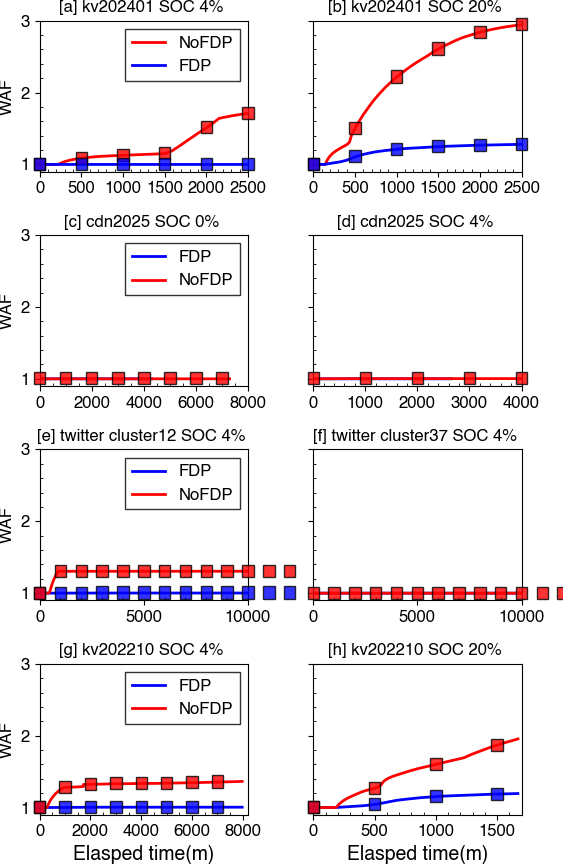

In [36]:
#------------------------------------------------------------#
fig, ax = plt.subplots(4,2, figsize=(6,9), sharey=True)
#------------------------------------------------------------#
data_dir ="./archive/result-Cachelib/samsung/"
superworkload= ['kv2024/']
workload = [ 'soc4/','soc20/']
sub_dirs=[ 'nofdp/','fdp/']
filename="samsung_waf_1min.txt"

#print (data_dir+filename)
this_dev_cap_TB = 7.68
x_cut_lim = 6

TEXT_FONT_SIZE=SMALL_SIZE
#------------------------------------------------------------#
for h, sup in enumerate(superworkload):
    for i , w in enumerate(workload):
        for s, sdir in enumerate(sub_dirs):
            path = data_dir + sup + w + sdir 
            if (check_file_existence(path, filename) <= 0):
                continue
            info_list = waf_log_to_waf_lists(path,filename)
            waf_list = info_list[0]
            hbmw_list = info_list[1] 
            mbmw_list= info_list[2] 
            erase_list= info_list[3] 

            hbmw_list_TB = [ x/this_dev_cap_TB for x in hbmw_list] 

            #----------------------- Figure -----------------------#
            ax2=ax[h][i]

            my_waf_text_index = get_waf_by_aligned_hbmw(path, this_dev_cap_TB, filename, x_cut_lim)
            hop = 500
            a= 100

            if re.match('nofdp/', sdir)!=None : 
                #ax2.plot(hbmw_list_TB, waf_list, linewidth=2 ,color='red', label='noFDP')
                ax2.plot(np.arange(len(waf_list)), waf_list, linewidth=2 ,color='red', label='NoFDP')
                if (re.search("soc20/",w) != None ):
                    for j, v in enumerate(waf_list[:hop*x_cut_lim:hop]):
                        #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                        #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                        # if j > 0:
                        #     ax2.text(j*hop+a, v-0.3, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, color='red' ,rotation=-45, fontproperties=helvetica_prop)
                        ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='red', alpha=0.8))    

                else : 
                    #for j, v in enumerate(my_waf_text_index[::hop]):
                    for j, v in enumerate(waf_list[:hop*x_cut_lim:hop]):
                        #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                        #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                        # if j > 1:
                        #     ax2.text(j*hop-a, v+0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, color='red' ,rotation=-45, fontproperties=helvetica_prop)
                        ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='red', alpha=0.8))    

            elif  re.match('fdp/', sdir)!=None : 
                ax2.plot(np.arange(len(waf_list)), waf_list, linewidth=2,color='blue', label='FDP')
                #for j, v in enumerate(my_waf_text_index[::hop]):
                for j, v in enumerate(waf_list[:hop*x_cut_lim:hop]):    
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                    # if (re.search("soc20/",w) != None ) and j > 1:
                    #     ax2.text(j*hop-a, v+0.05, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, color='blue' , rotation=-45, fontproperties=helvetica_prop)
                    # elif j > 3 and re.search('6204/', w) == None :
                    #     ax2.text(j*hop-a, v+0.05, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, color='blue' , rotation=-45, fontproperties=helvetica_prop)
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))

#------------------------------------------------------------#
data_dir ="./archive/result-Cachelib/samsung/cdn/"
workload = [ 'soc0/', 'soc4/']
sub_dirs=[ 'fdp/','nofdp/']
filename="samsung_waf_1min.txt"

#print (data_dir+filename)
this_dev_cap_TB = 7.68
x_cut_lim = 60

TEXT_FONT_SIZE=SMALL_SIZE

#------------------------------------------------------------#

for i , w in enumerate(workload):
    for s, sdir in enumerate(sub_dirs):
        path = data_dir+ w + sdir 
        if (check_file_existence(path, filename) <= 0):
            continue
        info_list = waf_log_to_waf_lists(path,filename)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 

        hbmw_list_TB = [ x/this_dev_cap_TB for x in hbmw_list] 

        #----------------------- Figure -----------------------#
        ax2=ax[1][i]

        my_waf_text_index = get_waf_by_aligned_hbmw(path, this_dev_cap_TB, filename, x_cut_lim)
        hop = 1000
        a= 150
        if re.match('nofdp/', sdir)!=None : 
            ax2.plot(np.arange(len(waf_list)), waf_list, linewidth=2 ,color='red', label='NoFDP')
            for j, v in enumerate(waf_list[:hop*x_cut_lim:hop]):
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                #if j > 1:
                #    ax2.text(j*hop-a, v+0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45,color='red')
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='red', alpha=0.8))    

        elif  re.match('fdp/', sdir)!=None : 
            ax2.plot(np.arange(len(waf_list)), waf_list, linewidth=2 ,color='blue', label='FDP')
        #     for j, v in enumerate(waf_list[:hop*x_cut_lim:hop]):
        #         #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
        #         #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
        #         if j > 1 and re.search('6204/', w) == None :
        #             ax2.text(j*hop+a, v+0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45,color='blue')
        #         ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))

#------------------------------------------------------------#
data_dir ="./archive/result-Cachelib/samsung/twitter-cluster12/"
workload = [ './']
sub_dirs=[ 'fdp/','nofdp/']
filename="samsung_waf_1min.txt"

#print (data_dir+filename)
this_dev_cap_TB = 7.68
x_cut_lim = 60

TEXT_FONT_SIZE=SMALL_SIZE

#------------------------------------------------------------#

for i , w in enumerate(workload):
    for s, sdir in enumerate(sub_dirs):
        path = data_dir+ w + sdir 
        if (check_file_existence(path, filename) <= 0):
            continue
        info_list = waf_log_to_waf_lists(path,filename)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 

        hbmw_list_TB = [ x/this_dev_cap_TB for x in hbmw_list] 

        #----------------------- Figure -----------------------#
        ax2=ax[2][i]

        my_waf_text_index = get_waf_by_aligned_hbmw(path, this_dev_cap_TB, filename, x_cut_lim)
        hop = 1000
        a= 120

        if re.match('nofdp/', sdir)!=None : 
            ax2.plot(np.arange(len(waf_list)), waf_list, linewidth=2 ,color='red', label='NoFDP')
            for j, v in enumerate(waf_list[:hop*x_cut_lim:hop]):
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                #if j > 1:
                #    ax2.text(j*hop-a, v+0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45,color='red')
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='red', alpha=0.8))    

        elif  re.match('fdp/', sdir)!=None : 
            ax2.plot(np.arange(len(waf_list)), waf_list, linewidth=2 ,color='blue', label='FDP')
            for j, v in enumerate(waf_list[:hop*x_cut_lim:hop]):
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                #if j > 1 and re.search('6204/', w) == None :
                #    ax2.text(j*hop+a, v+0.05, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45,color='blue')
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))

#------------------------------------------------------------#
data_dir ="./archive/result-Cachelib/samsung/twitter-cluster37/"
workload = [ './']
sub_dirs=[ 'fdp/','nofdp/']
filename="samsung_waf_1min.txt"

#print (data_dir+filename)
this_dev_cap_TB = 7.68
x_cut_lim = 60
TEXT_FONT_SIZE=SMALL_SIZE

#------------------------------------------------------------#
for i , w in enumerate(workload):
    for s, sdir in enumerate(sub_dirs):
        path = data_dir+ w + sdir 
        if (check_file_existence(path, filename) <= 0):
            continue
        info_list = waf_log_to_waf_lists(path,filename)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 

        hbmw_list_TB = [ x/this_dev_cap_TB for x in hbmw_list] 

        #----------------------- Figure -----------------------#
        ax2=ax[2][1]

        my_waf_text_index = get_waf_by_aligned_hbmw(path, this_dev_cap_TB, filename, x_cut_lim)
        hop = 1000
        a= 100

        if re.match('nofdp/', sdir)!=None : 
            ax2.plot(np.arange(len(waf_list)), waf_list, linewidth=2 ,color='red', label='NoFDP')
            for j, v in enumerate(waf_list[:hop*x_cut_lim:hop]):
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                #if j > 0:
                #    ax2.text(j*hop-a, v+0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45,color='red')
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='red', alpha=0.8))    

        elif  re.match('fdp/', sdir)!=None : 
            ax2.plot(np.arange(len(waf_list)), waf_list, linewidth=2 ,color='blue', label='FDP')
            # for j, v in enumerate(waf_list[:hop*x_cut_lim:hop]):
            #     #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
            #     #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
            #     if j > 1 and re.search('6204/', w) == None :
            #         ax2.text(j*hop+a, v+0.05, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45,color='blue')
            #     ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))

#------------------------------------------------------------#
data_dir ="./archive/result-Cachelib/samsung/kv202210/"
workload = [ 'soc4/', 'soc20/']
sub_dirs=[ 'fdp/','nofdp/']
filename="samsung_waf_1min.txt"

#print (data_dir+filename)
this_dev_cap_TB = 7.68
x_cut_lim = 14

TEXT_FONT_SIZE=SMALL_SIZE

# #------------------------------------------------------------#
for i , w in enumerate(workload):
    for s, sdir in enumerate(sub_dirs):
        path = data_dir+ w + sdir 
        if (check_file_existence(path, filename) <= 0):
            continue
        info_list = waf_log_to_waf_lists(path,filename)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 

        hbmw_list_TB = [ x/this_dev_cap_TB for x in hbmw_list] 

        #----------------------- Figure -----------------------#
        ax2=ax[3][i]

        my_waf_text_index = get_waf_by_aligned_hbmw(path, this_dev_cap_TB, filename, x_cut_lim)
        if re.match('soc4/',w) != None:
            hop=1000
        else:
            hop = 500
        a= 1

        if re.match('nofdp/', sdir)!=None : 
            ax2.plot(np.arange(len(waf_list)), waf_list, linewidth=2 ,color='red', label='NoFDP')

            
            for j, v in enumerate(waf_list[::hop]):
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                #if j > 1:
                #    ax2.text(j*hop-a, v, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45,color='red')
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='red', alpha=0.8))    

        elif  re.match('fdp/', sdir)!=None : 
            ax2.plot(np.arange(len(waf_list)), waf_list, linewidth=2 ,color='blue', label='FDP')
            for j, v in enumerate(waf_list[::hop]):
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                #if j > 1 and re.search('6204/', w) == None :
                #    ax2.text(j*hop+a, v+0.05, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45,color='blue')
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor='blue', alpha=0.8))



#------------------------------------------------------------#
ax[0][0].set_title("[a] kv202401 SOC 4% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
ax[0][1].set_title("[b] kv202401 SOC 20% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
ax[1][0].set_title("[c] cdn2025 SOC 0% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
ax[1][1].set_title("[d] cdn2025 SOC 4% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
ax[2][0].set_title("[e] twitter cluster12 SOC 4% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
ax[2][1].set_title("[f] twitter cluster37 SOC 4% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
ax[3][0].set_title("[g] kv202210 SOC 4% ", fontsize=BIGGER_SIZE, fontproperties=helvetica_prop)
ax[3][1].set_title("[h] kv202210 SOC 20% " , fontsize=BIGGER_SIZE      , fontproperties=helvetica_prop           )

ax[0][0].legend(frameon=True,fancybox=False, edgecolor='k', fontsize=BIGGER_SIZE,prop=helvetica_prop )
ax[1][0].legend(frameon=True,fancybox=False, edgecolor='k', fontsize=BIGGER_SIZE,prop=helvetica_prop )
ax[2][0].legend(frameon=True,fancybox=False, edgecolor='k', fontsize=BIGGER_SIZE,prop=helvetica_prop )
ax[3][0].legend(frameon=True,fancybox=False, edgecolor='k', fontsize=BIGGER_SIZE,prop=helvetica_prop )


ax[3][0].set_xlabel(
    'Elasped time(m)',
    fontproperties=helvetica_prop,fontsize=MEDIUM_SIZE-2)
ax[3][1].set_xlabel(
    'Elasped time(m)',
    fontproperties=helvetica_prop,fontsize=MEDIUM_SIZE-2)

for i in range(1):
    ax2 = ax[i][0]
    label = ax2.set_ylabel("WAF", fontsize=BIGGER_SIZE)
    label.set_fontproperties(helvetica_prop)
    for j in range(2):
        #ax[i].set_xlabel("Host Data Written (Relative to cap)")
        #ax2.grid()
        ax2 = ax[i][j]
        ax2.set_ylim([0.9,3])
        ax2.set_xlim([0.0,2500])
        ax2.set_xticks([0,500,1000,1500,2000,2500])
        labels = [label.get_text() for label in ax2.get_xticklabels()]
        ax2.set_xticklabels([t for t in labels], fontproperties=helvetica_prop)

for i in range(4):
    #ax2=ax
    ax2 = ax[i][0]
    
    ax2.tick_params(axis='x', which='minor', direction='in')
    ax2.tick_params(axis='y', which='minor', direction='in')
    ax2.minorticks_on()
    label = ax2.set_ylabel("WAF", fontsize=BIGGER_SIZE)
    label.set_fontproperties(helvetica_prop)
    
    for label in ax2.get_yticklabels():
        label.set_fontsize(MEDIUM_SIZE)
        label.set_fontproperties(helvetica_prop)
        
    ax2 = ax[i][1]
    ax2.tick_params(axis='x', which='minor', direction='in')
    ax2.tick_params(axis='y', which='minor', direction='in')
    ax2.minorticks_on()
    
    #ax2.set_ylabel("DLWA", fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
    # label = ax2.set_ylabel("DLWA", fontsize=BIGGER_SIZE)
    # label.set_fontproperties(helvetica_prop)

ax[3][1].set_xlim([0.0,1700])

ax[1][0].set_xlim([0.0,8000])
ax[1][0].set_xticks([x*2000 for x in range(5)])
labels = [label.get_text() for label in ax[1][0].get_xticklabels()]
ax[1][0].set_xticklabels([t for t in labels], fontproperties=helvetica_prop)

ax[1][1].set_xlim([0.0,4000])
ax[1][1].set_xticks([x*1000 for x in range(5)])
labels = [label.get_text() for label in ax[1][1].get_xticklabels()]
ax[1][1].set_xticklabels([t for t in labels], fontproperties=helvetica_prop)

ax[2][0].set_xlim([0.0,10000])
ax[2][0].set_xticks([x*5000 for x in range(3)])
labels = [label.get_text() for label in ax[2][0].get_xticklabels()]
ax[2][0].set_xticklabels([t for t in labels], fontproperties=helvetica_prop)
ax[2][1].set_xlim([0.0,10000])
ax[2][1].set_xticks([x*5000 for x in range(3)])
labels = [label.get_text() for label in ax[2][1].get_xticklabels()]
ax[2][1].set_xticklabels([t for t in labels], fontproperties=helvetica_prop)

ax[3][0].set_xlim([0.0,8200])
ax[3][0].set_xticks([x*2000 for x in range(5)])
labels = [label.get_text() for label in ax[3][0].get_xticklabels()]
ax[3][0].set_xticklabels([t for t in labels], fontproperties=helvetica_prop)

ax[3][1].set_xlim([0.0,1700])
ax[3][1].set_xticks([x*500 for x in range(4)])
labels = [label.get_text() for label in ax[3][1].get_xticklabels()]
ax[3][1].set_xticklabels([t for t in labels], fontproperties=helvetica_prop)



#fig.text(0.15, 0.05, r'$\mathrm{rHMW} = \frac{\mathrm{Host\ Media\ Written(TB)}}{ Dev. Cap.(=7.68\ \mathrm{TB})}$', fontsize=MEDIUM_SIZE)

fig.tight_layout()

# ------------------- #
# ------------------- #



./archive/result-Cachelib/samsung/kv202206-noise/nofdp/soc40/samsung_waf_1min.txt
./archive/result-Cachelib/samsung/kv202206-noise/nofdp/noise40_soc40_10x1/samsung_waf_1min.txt len  2022
./archive/result-Cachelib/samsung/kv202206-noise/nofdp/noise40_soc40_10x4/samsung_waf_1min.txt len  1600
./archive/result-Cachelib/samsung/kv202206-noise/fdp/soc40/samsung_waf_1min.txt
./archive/result-Cachelib/samsung/kv202206-noise/fdp/noise40_soc40_10x1/samsung_waf_1min.txt len  6291
./archive/result-Cachelib/samsung/kv202206-noise/fdp/noise40_soc40_40x1/samsung_waf_1min.txt len  9529


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


./archive/result-Cachelib/samsung/kv202206-noise/fdp//noise40_soc40_10x4/samsung_waf_1min.txt len  7543


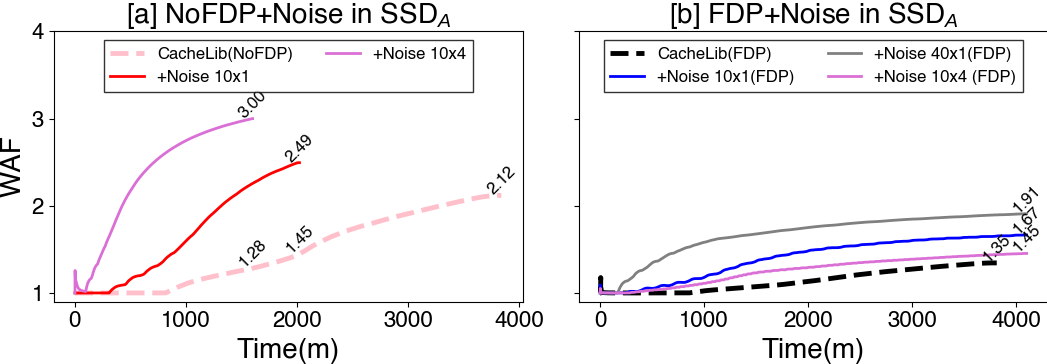

In [25]:
# --------------------------------------------------- #
import matplotlib.pyplot as plt
import re

plt.rc('xtick',labelsize=MEDIUM_SIZE)
plt.rc('ytick',labelsize=MEDIUM_SIZE)
# --------------------------------------------------- #
# --------  waf parser in warmup ---------- #
def waf_log_to_list (data_dir, filename=None):
    # ----------------------- Regular Expr. ------------------------- #
    num_re=re.compile(r'[0-9]+')
    hbmw_re=re.compile(r'.*(HBMW)')
    mbmw_re=re.compile(r'.*(MBMW)')
    mbe_re=re.compile(r'.*(MBE)')
    # ---------------------------------------------------------------- #

    if filename is None:
        filename = "samsung_waf_1sec.txt"
    
    waf_list = []
    hbmw_list = []
    mbmw_list = []
    erase_list=[]
    
    #print (data_dir+t+filename)
    waf_data = data_dir+filename
    file1 = open(waf_data, 'r')
    Lines = file1.readlines()
    start_h = None
    start_d = None
    start_e = None
    for line in Lines:
        line = ''.join(line).strip().replace(",", '')
        if hbmw_re.match(line) or mbmw_re.match(line) or mbe_re.match(line):
            if hbmw_re.match(line):
                l = num_re.findall(line)
                if (start_h is None):
                    start_h = int(l[0])
                host_kb = (int(l[0]) - start_h)/1024
                host_mb = host_kb/1024
                #print('host(Mb)', host_mb)
            elif mbmw_re.match(line):
                l = num_re.findall(line)
                if (start_d is None):
                    start_d = int(l[0])
                dev_kb = (int(l[0]) - start_d)/1024 
                dev_mb = dev_kb/1024
                #print('dev(Mb)', dev_mb )
                
            elif mbe_re.match(line):
                l = num_re.findall(line)
                if (start_e is None):
                    start_e = int(l[0])
                erase_kb = (int(l[0]) - start_e) / 1024 
                erase_mb = erase_kb/1024 
                #print(erase_mb)

                if host_mb == 0.0:
                    waf_list.append(1.0)
                    hbmw_list.append(0)
                    mbmw_list.append(0)
                    erase_list.append(0)

                else:
                    #print(start_h,"start_h", start_d, "start_d")
                    waf_list.append( round(dev_mb/host_mb, 3) )
                    hbmw_list.append(host_mb/1024/1024)
                    mbmw_list.append(dev_mb/1024/1024)
                    erase_list.append(erase_mb/1024/1024)
    
    #return in terabytes
    return [waf_list, hbmw_list , mbmw_list, erase_list]
# assumes: MEDIUM_SIZE, SMALL_SIZE, waf_log_to_list, waf_log_to_waf_lists are defined

#print (data_dir+filename)
this_dev_cap_TB = 7.68
x_cut_lim = 50
#x_cut_lim = 5

TEXT_FONT_SIZE=SMALL_SIZE
# ------------------------------------------------------------ #
fig, ax = plt.subplots(1, 2, figsize=(11, 4), sharey=True)
ax1, ax2 = ax[0], ax[1]
# ------------------------------------------------------------ #

ax1.set_title("No FDP")
ax2.set_title("FDP enabled")
ax1.set_xlabel("Time(m)", fontsize=MEDIUM_SIZE+4)
ax2.set_xlabel("Time(m)", fontsize=MEDIUM_SIZE+4)

# ---------- small helper to load and plot one series (time & HW axes) ----------
def plot_series(ax_time, data_dir, color, label, step_time=500, step_hw=500, x_cut_lim=None, title_override=None, font_prp=None):
    ret = waf_log_to_list(data_dir, "samsung_waf_1min.txt")
    waf_list, hbmw_list, mbmw_list, erase_list = ret
    print(data_dir + "samsung_waf_1min.txt", "len ", len(waf_list))

    if x_cut_lim==None:
        x_cut_lim = 50
        
    if len(waf_list) > 4100:
        waf_list = waf_list[:4100]
        
    hbmw_list_TB  = [x / 7.68 for x in hbmw_list]
    # curves
    ax_time.plot(range(len(waf_list)), waf_list, lw=2, color=color, label=label)
    if font_prp!=None:
        ax_time.text(len(waf_list), waf_list[-1]+0.01, f"{(waf_list[-1]):.2f}",
                    ha="center", fontsize=SMALL_SIZE, rotation=45, fontproperties=font_prp )
        if title_override:
            ax_time.set_title(title_override)
    else:
        if title_override:
            ax_time.set_title(title_override, fontproperties=fonet_prp)

# ============================== noFDP ============================== #


# baseline (No Noise) uses waf_log_to_waf_lists in original; keep it
data_dir = "./archive/result-Cachelib/samsung/kv202206-noise/nofdp/soc40/"
print(data_dir + "samsung_waf_1min.txt")
info_list  = waf_log_to_waf_lists(data_dir, "samsung_waf_1min.txt")
waf_list   = info_list[0]
hbmw_list  = info_list[1]
hbmw_list_TB = [x / 7.68 for x in hbmw_list]
ax1.plot(range(len(waf_list)), waf_list, lw=3.5, linestyle='--', color='pink', label="CacheLib(NoFDP)")
ax1.text(len(waf_list), waf_list[-1]+0.01, f"{waf_list[-1]:.2f}", ha="center", fontsize=SMALL_SIZE, rotation=45)
ax1.text(1600, waf_list[1600]+0.01, f"{waf_list[1600]:.2f}", ha="center", fontsize=SMALL_SIZE, rotation=45)
ax1.text(2022, waf_list[2022]+0.01, f"{waf_list[2022]:.2f}", ha="center", fontsize=SMALL_SIZE, rotation=45)

plot_series(ax_time=ax1,
    data_dir="./archive/result-Cachelib/samsung/kv202206-noise/nofdp/noise40_soc40_10x1/",
    color="red", label="+Noise 10x1", step_time=500, step_hw=500,
    font_prp=helvetica_prop
)
plot_series(ax_time=ax1,
    data_dir="./archive/result-Cachelib/samsung/kv202206-noise/nofdp/noise40_soc40_10x4/",
    color="orchid", label="+Noise 10x4", step_time=500, step_hw=500,
    font_prp=helvetica_prop
)

# baseline (No Noise) uses waf_log_to_waf_lists in original; keep it
data_dir="./archive/result-Cachelib/samsung/kv202206-noise/fdp/soc40/"
print(data_dir + "samsung_waf_1min.txt")
info_list  = waf_log_to_waf_lists(data_dir, "samsung_waf_1min.txt")
waf_list   = info_list[0]
hbmw_list  = info_list[1]
hbmw_list_TB = [x / 7.68 for x in hbmw_list]

ax2.plot(range(len(waf_list)), waf_list, lw=3.5, linestyle='--', color='k', label="CacheLib(FDP)")
ax2.text(len(waf_list), waf_list[-1]+0.01, f"{waf_list[-1]:.2f}", ha="center", fontsize=SMALL_SIZE, rotation=45)

#for j, v in enumerate(waf_list[::1000]): ax1.text(j*1000, v+0.01, f"{v:.2f}", ha="center", fontsize=SMALL_SIZE, rotation=45)
#for j, v in enumerate(hbmw_list[::500]): ax1.text(v, waf_list[j*500]+0.01, f"{(waf_list[j*500]+0.01):.2f}", ha="center", fontsize=SMALL_SIZE, rotation=45)
# =============================== FDP =============================== #
# plot_series(ax_hw=ax2,
#     data_dir="/home/inho/git/CacheLib/inho-run-cachelib/fdp_vs_nofdp/samsung/fdp/kvcache202206/soc40/",
#     color="black", label="CacheLib(FDP)", step_time=500, step_hw=500,
#     font_prp=helvetica_prop
# )
plot_series(ax_time=ax2,
    data_dir="./archive/result-Cachelib/samsung/kv202206-noise/fdp/noise40_soc40_10x1/",
    color="blue", label="+Noise 10x1(FDP)", step_time=500, step_hw=500,
    font_prp=helvetica_prop
)
plot_series(ax_time=ax2,
    data_dir="./archive/result-Cachelib/samsung/kv202206-noise/fdp/noise40_soc40_40x1/",
    color="gray", label="+Noise 40x1(FDP)", step_time=500, step_hw=500,
    font_prp=helvetica_prop
)
plot_series(ax_time=ax2,
    data_dir="./archive/result-Cachelib/samsung/kv202206-noise/fdp//noise40_soc40_10x4/",
    color="orchid", label="+Noise 10x4 (FDP)", step_time=1000, step_hw=500,
    font_prp=helvetica_prop
)
# ---------------- common aesthetics (unchanged) ----------------
for a in (ax1, ax2):
    a.set_ylim([0.9, 4])

for label in ax1.get_yticklabels():
    label.set_fontproperties(helvetica_prop)
    label.set_fontsize(MEDIUM_SIZE)

ax1.set_ylabel("WAF", fontsize=MEDIUM_SIZE+4)
ax1.legend(prop= helvetica_prop ,fontsize=MEDIUM_SIZE+4, edgecolor='k', fancybox=False, ncol=2, loc='upper center')  # keep legend placement as in original
ax2.legend(prop= helvetica_prop ,fontsize=MEDIUM_SIZE+4, edgecolor='k', fancybox=False, ncol=2, loc='upper center')  # keep legend placement as in original

ax1.set_title(r"[a] NoFDP+Noise in SSD$_{A}$",fontproperties= helvetica_prop, fontsize=MEDIUM_SIZE+4)
ax2.set_title(r"[b] FDP+Noise in SSD$_{A}$",fontproperties= helvetica_prop, fontsize=MEDIUM_SIZE+4)

fig.tight_layout()
# --------------------------------------------------- #

# ------------------- #
# isConference=False
# if isConference:
#    save_dir = "/home/inho/git/fast25-cylon-fdp/v1/F/observ/"
#    fig_name = "cachelib_noise"
#    plt.savefig("{0}{1}.eps".format(save_dir,fig_name) )
#    plt.savefig("{0}{1}.pdf".format(save_dir,fig_name) )
#    plt.savefig("{0}{1}.png".format(save_dir,fig_name) )
#    plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name))
# ------------------- #


[Check!] ./archive/result-FIO/cylon448-II/3syn/zipf_2.2/nofdp/samsung_waf_1sec.txt
./archive/result-FIO/cylon448-II/3syn/zipf_2.2/nofdp/
[Check!] ./archive/result-FIO/cylon448-II/3syn/zipf_2.2/nofdp/samsung_waf_1sec.txt


hbmw_list_TB 8.428190614495959
[Check!] ./archive/result-FIO/cylon448-II/3syn/zipf_2.2/fdp_share/samsung_waf_1sec.txt
./archive/result-FIO/cylon448-II/3syn/zipf_2.2/fdp_share/
[Check!] ./archive/result-FIO/cylon448-II/3syn/zipf_2.2/fdp_share/samsung_waf_1sec.txt
hbmw_list_TB 8.712423435279302
[Check!] ./archive/result-FIO/cylon448-II/3syn/zipf_2.2/fdp/samsung_waf_1sec.txt
./archive/result-FIO/cylon448-II/3syn/zipf_2.2/fdp/
[Check!] ./archive/result-FIO/cylon448-II/3syn/zipf_2.2/fdp/samsung_waf_1sec.txt
hbmw_list_TB 8.984004523072924
[Check!] ./archive/result-FIO/cylon448-II/3syn/zipf_1.2/nofdp/samsung_waf_1sec.txt
./archive/result-FIO/cylon448-II/3syn/zipf_1.2/nofdp/
[Check!] ./archive/result-FIO/cylon448-II/3syn/zipf_1.2/nofdp/samsung_waf_1sec.txt
hbmw_list_TB 8.222912464823041
[Check!] ./archive/result-FIO/cylon448-II/3syn/zipf_1.2/fdp_share/samsung_waf_1sec.txt
./archive/result-FIO/cylon448-II/3syn/zipf_1.2/fdp_share/
[Check!] ./archive/result-FIO/cylon448-II/3syn/zipf_1.2/fdp_share

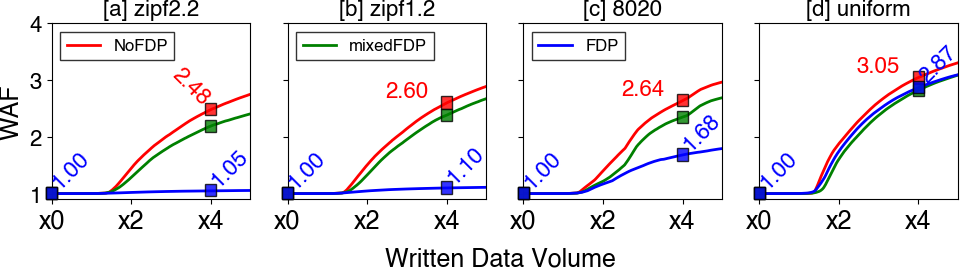

In [12]:
from inho_parser import * 
#------------------------------------------------------------#
mpl.rcParams['savefig.pad_inches'] = 0
fig, ax = plt.subplots(1,4, figsize=(10,3), sharey=True)
plt.style.use('tableau-colorblind10')
#------------------------------------------------------------#

def first_available_font(candidates):
    available = {f.name for f in fm.fontManager.ttflist}
    for name in candidates:
        if name in available:
            return name
    return None

# Prefer Arial; otherwise use Liberation Sans, then Lato, then DejaVu Sans
math_family = first_available_font(['Arial', 'Liberation Sans', 'Lato', 'DejaVu Sans'])
if math_family is None:
    print("WTF DejaVu Sans")
    math_family = 'DejaVu Sans'  # last-resort

# Make mathtext use the chosen family (instead of DejaVu fallback)
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = math_family
mpl.rcParams['mathtext.it'] = f'{math_family}:italic'
mpl.rcParams['mathtext.bf'] = f'{math_family}:bold'

MEDIUM_PLUS_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_PLUS_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_PLUS_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

# Try to use Helvetica or fallback to similar fonts
# Step 1: Provide full path to Helvetica.ttc
# Load Helvetica.ttc manually
font_path = "./archive/Helvetica.ttc"
helvetica_prop = fm.FontProperties(fname=font_path)
# Step 1: Manually load Helvetica.ttc
font_path = './archive/Helvetica.ttc'
helvetica_font = fm.FontProperties(fname=font_path)
font_name = helvetica_font.get_name()

# Step 2: Add to font manager cache
fm.fontManager.addfont(font_path)

# Step 3: Now set as default
mpl.rcParams['font.family'] = font_name
mpl.rcParams['font.family'] = helvetica_prop.get_name()

#------------------------------------------------------------#


#fdev="Samsung-FDP-PM9D3a-MZWL67T6HBLC-7.68TB-PCIeGen5/"
#fdev=
workload4= ['zipf_2.2/', 'zipf_1.2/', 'zoned/' , 'uniform/']
subdirs=[ 'nofdp/','fdp_share/','fdp/' ] 
labeld =[ 'NoFDP', 'mixedFDP' ,'FDP' ]
data_dir = "./archive/result-FIO/cylon448-II/3syn/"
TEXT_FONT_SIZE = MEDIUM_SIZE

#util = ['{0}/'.format(x*100) for x in np.arange(1,6) ]
#bbss = ['{0}K/'.format(4**x) for x in np.arange(1,5)]
#print(bbss)
# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload4):
    for j,sdir in enumerate(subdirs):
        # ------------------ Reading results -------------------#
        filename="samsung_waf_1sec.txt"

        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir,filename)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        this_dev_cap_TB= 448/1024
        hbmw_list_TB = [ x / this_dev_cap_TB for x in hbmw_list]
        # if (w == 'necsst02zipf_1.2/zipf_1.2/') and (sdir == 'fdp/'):
        #     l = len(hbmw_list_TB)
        #     cn = int(l/3)
        #     hbmw_list_TB = hbmw_list_TB[:cn]
        #     waf_list = waf_list[:cn]

        #print( len(waf_list), len(hbmw_list) )
        assert (len(waf_list) == len(hbmw_list_TB)) and (len(waf_list) > 0)
        x_cut_lim = 7
        lim=len(hbmw_list_TB)
        for k, hb in enumerate(hbmw_list_TB):
            if hb >= x_cut_lim:
                lim = k
                break
        hbmw_list_TB = hbmw_list_TB[:lim]
        waf_list = waf_list[:lim]
        # --------------------------------------------------- # 



        # ------------------ Plotting -------------------#
        ax2 = ax[i]
        if (sdir=='nofdp/'):
            ax2.plot(hbmw_list_TB, waf_list, linewidth=2,  label=labeld[j], color='red')
        elif (sdir == 'fdp_share/'):
            ax2.plot(hbmw_list_TB, waf_list, linewidth=2,  label=labeld[j], color='green')
        elif (sdir == 'fdp/'):
            ax2.plot(hbmw_list_TB, waf_list, linewidth=2, label=labeld[j], color='blue')
        else:
            ax2.plot(hbmw_list_TB, waf_list, linewidth=2, label=w+sdir)
        #ax2.set_title(" {0}".format(w))
        #ax2.set_ylim([0.9 , 4.0])

        ax2.set_ylim([0.9,4.2])
        # --------------------------------------------------- # 

        # ------------------ texting on fig -------------------#
        #ax2.legend()
        hop=4
        a=0.5
        my_waf_text_index = get_waf_by_aligned_hbmw(data_dir+w+sdir, this_dev_cap_TB, filename, x_cut_lim)
        if re.match(w, "zipf_2.2/") != None:
            if (re.match(sdir,"nofdp/")!=None) :
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                    if j > 0:
                        ax2.text(j*hop-a, v+0.1, "%.2f" %v, ha="center", rotation=-45,fontsize=TEXT_FONT_SIZE, color='red', fontproperties=helvetica_prop)
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor='red', alpha=0.8))
            elif (re.search(sdir,"fdp/")!=None) :
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                    ax2.text(j*hop+a, v+0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, color='blue', rotation=45, fontproperties=helvetica_prop)
                    #ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor='blue', alpha=0.8))
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor='blue', alpha=0.8))
            elif (re.search(sdir,"fdp_share/")!=None) :
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #if j > 0:
                    #    ax2.text(j*hop+a, v-0.2, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, color='green', fontproperties=helvetica_prop)
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor='green', alpha=0.8))

        else:
            if (re.match(sdir,"nofdp/")!=None) :
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                    if j > 0:
                        ax2.text(j*hop- 2*a, v+0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, color='red', fontproperties=helvetica_prop)
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor='red', alpha=0.8))
            elif (re.search(sdir,"fdp/")!=None) :
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12, rotation=45)
                    #ax2.text(j, v+0.1, "%.2f" %v, ha="center", fontsize=12)
                    ax2.text(j*hop+a, v+0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, color='blue', rotation=45, fontproperties=helvetica_prop)
                    #ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor='blue', alpha=0.8))
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor='blue', alpha=0.8))
            elif (re.search(sdir,"fdp_share/")!=None) :
                for j, v in enumerate(my_waf_text_index[::hop]):
                    #if j > 0:
                    #    ax2.text(j*hop+a, v-0.2, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, color='green', fontproperties=helvetica_prop)
                    ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor='green', alpha=0.8))

        # for j, v in enumerate(waf_list[::20000]):
        #     ax2.text(hbmw_list_TB[j*20000], v+0.01, "%.2f" %v, ha="center", fontsize=12, rotation=45)
        # --------------------------------------------------- # 
        # ------------------ adjusting each fig -------------------#
        #ax2.grid(which='major', axis='both', linestyle='--')
        # --------------------------------------------------------- # 

# --------------------------------------------------- # 
ax[0].set_ylabel("WAF", fontproperties=helvetica_prop , fontsize=MEDIUM_SIZE+2)

# Collect handles and labels from the full figure
handles, labels = ax[0].get_legend_handles_labels()

# Split into two groups (first 3 and last 3, adjust as needed)
handles1, labels1 = handles[:1], labels[:1]
handles2, labels2 = handles[1:2], labels[1:2]
handles3, labels3 = handles[2:], labels[2:]

# Rename labels (example)
#labels1 = ["Greedy_noFDP", "Greedy_FDPshare", "Greedy_FDP"]
#labels2 = ["CB_noFDP", "CB_FDPshare", "CB_FDP"]

# Place legends in different axes
ax[0].legend(handles1, labels1, prop=helvetica_prop, loc="upper left", frameon=True, fontsize=MEDIUM_SIZE ,fancybox=False, edgecolor='k')
ax[1].legend(handles2, labels2, prop=helvetica_prop, loc="upper left", frameon=True, fontsize=MEDIUM_SIZE ,fancybox=False, edgecolor='k')
ax[2].legend(handles3, labels3, prop=helvetica_prop, loc="upper left", frameon=True, fontsize=MEDIUM_SIZE ,fancybox=False, edgecolor='k')


#ax[0].legend(loc='upper left', fontsize=MEDIUM_SIZE ,fancybox=False, edgecolor='k', frameon=True)
#ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=MEDIUM_SIZE ,frameon=True)
#fig.text(0.1, 0.05, r'$\mathrm{rHMW(7.68TiB)} = \frac{\mathrm{Host\ Media\ Written(TiB)}}{ Dev. Cap.(=7.68\ \mathrm{TiB})}$', fontsize=BIGGER_SIZE)

# fig.text(0.1, 0.05, r'$\mathrm{rHMW(7.68TiB)}$', fontsize=BIGGER_SIZE)
# fig.text(0.433, 0.05, r'$\mathrm{rHMW(3.84TiB)}$', fontsize=BIGGER_SIZE)
# fig.text(0.766, 0.05, r'$\mathrm{rHMW(224GiB)}$', fontsize=BIGGER_SIZE)

# ax[0].set_xlabel(r'$\mathrm{rHMW(224GiB))}$', fontproperties=helvetica_prop , fontsize=MEDIUM_SIZE)
# ax[1].set_xlabel(r'$\mathrm{rHMW(224GiB)}$', fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
# ax[2].set_xlabel(r'$\mathrm{rHMW(224GiB)}$', fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
# ax[3].set_xlabel(r'$\mathrm{rHMW(224GiB)}$', fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE )

# Example: append 'x' to each
ax[0].set_title("[a] zipf2.2", fontproperties=helvetica_prop , fontsize=MEDIUM_SIZE)
ax[1].set_title("[b] zipf1.2", fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
ax[2].set_title("[c] 8020", fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
ax[3].set_title("[d] uniform", fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)

fig.text(0.403, 0.05, 'Written Data Volume', fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE+2)

for i in range(4):
    ax2= ax[i]
    ax2.set_xlim([0,5])
    ax2.set_ylim([0.9,4])
    ax2.set_xticks([0,2,4])
    labels = [label.get_text() for label in ax2.get_xticklabels()]
    ax2.set_xticklabels([f"x{t}" for t in labels], fontproperties=helvetica_prop , fontsize = MEDIUM_SIZE+2 )

ax2.set_yticks([1,2,3,4])

#fig.suptitle("sLFS uniform: vendorA", fontsize=MEDIUM_SIZE)
#fig.suptitle(r'X-axis : $\mathrm{Relative HMW} = \frac{\mathrm{Host\ Media\ Written}}{ Dev. Cap.(=7.68\ \mathrm{TiB})}$', fontsize=MEDIUM_SIZE, va='bottom')

fig.tight_layout(rect=[0, 0.1, 1, 1])

# ------------------- #
#save_dir = "/home/inho/git/fast25-cylon-fdp/v1/F/observ/"
#fig_name = "3Syn_CylonA2"
#plt.savefig("{0}{1}.eps".format(save_dir,fig_name)  ) #, dpi=100)
#plt.savefig("{0}{1}.pdf".format(save_dir,fig_name)  ) #, dpi=100)
#plt.savefig("{0}{1}.png".format(save_dir,fig_name)  ) #, dpi=100)
#plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name) ) #, dpi=100)
# ------------------- #


[Check!] ./archive/ops-log/log-gc-zipf22-fdp
anchor_index  1  skipped 
anchor_index  2  skipped 
[Check!] ./archive/ops-log/log-gc-zipf12-fdp
anchor_index  1  skipped 
anchor_index  2  skipped 
[Check!] ./archive/ops-log/log-gc-zoned-fdp
anchor_index  1  skipped 


/tmp/ipykernel_2300712/3149245954.py:371: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels([t for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)


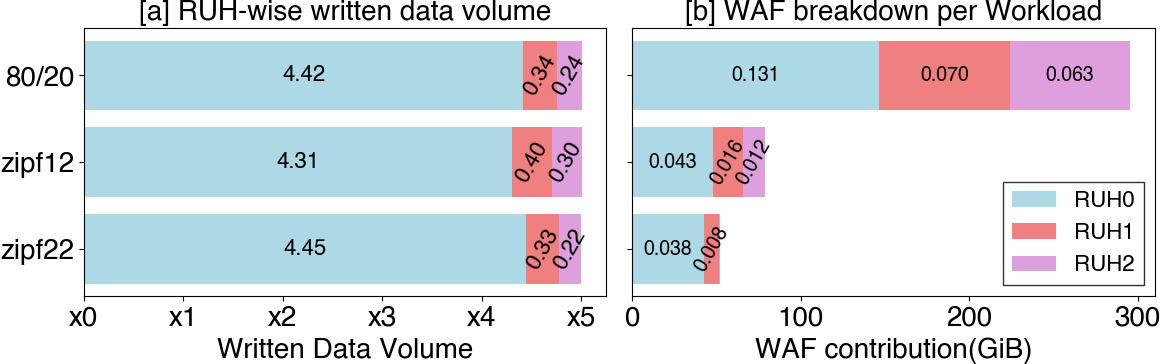

In [26]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels

#=======================================================================================#
this_dev_cap_GB = 224 * 1024 * 1024 * 1024
this_dev_cap = 224

data_dir = "./archive/ops-log/"
workload = [
    'log-gc-zipf22-fdp',
    'log-gc-zipf12-fdp',
    'log-gc-zoned-fdp',
]
hbmw_data = {
    'log-gc-zipf22-fdp': [[-1], [-1], [-1]],
    'log-gc-zipf12-fdp': [[-1], [-1], [-1]],
    'log-gc-zoned-fdp':  [[-1], [-1], [-1]],
}
mbmw_data = {
    'log-gc-zipf22-fdp': [[-1], [-1], [-1]],
    'log-gc-zipf12-fdp': [[-1], [-1], [-1]],
    'log-gc-zoned-fdp':  [[-1], [-1], [-1]],
}

bar_colors = ['lightblue', 'lightcoral', 'lightblue', 'lightcoral']

group_gap = 1.1
inner_gap = 0.4
x = []
for g in range(3):  # 3 RUH groups
    base = g * group_gap + g * 2 * inner_gap
    x.extend([base + i * inner_gap for i in range(2)])

x = np.array(x)

x_labels = []
for r in [0, 1, 2]:
    #x_labels.extend([f"RUH{r}\n5\nhbmw", f"RUH{r}\n5\nmbmw"])
    x_labels.extend([f"RUH{r} h.", f"RUH{r} m."])
            
# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    ret = check_file_existence(data_dir,w)
    if (ret == 0):
        continue
    # ----------------------- Regular Expr. ------------------------- #
    num_re=re.compile(r'[0-9]+')
    #float_re=re.compile(r'[0-9]\.[0-9]+')
    hbmw_re=re.compile(r'.*(HBMW)')
    mbmw_re=re.compile(r'.*(MBMW)')
    mbe_re=re.compile(r'.*(MBE)')
    util_data = data_dir
    file1 = open(util_data + w, 'r')
    hbmw_total = []
    avg_util={
        0:[],
        1:[],
        2:[]
    }
    valid_util={
        0:[],
        1:[],
        2:[]
    }
    ruh_hbmw={
        0:[],
        1:[],
        2:[]
    }
    ruh_mbmw={
        0:[],
        1:[],
        2:[]
    }    

    # --------------------------- FILE ------------------------ # 
    cnt=0
    anchor_index=0    
    x_point = 5
    local_ruh_hbmw=[[],[],[]]
    local_ruh_mbmw=[[],[],[]]
    
    Lines = file1.readlines()
    for j, line in enumerate(Lines) : 
        line = ''.join(line).strip().replace(",", '')
        #if num_re.match(line):
        l = num_re.findall(line)
        l = [ int(x) for x in l ]
        if(len(l) == 1 ):
            continue
        #print(l)
        #print(l[0], l[1], l[2], l[4]/l[5], type( l[4]/l[5]))
        # if l[2] != 0:
        #     print( "is_force {0} util {1} ruhid {2}".format(l[0], float(l[4]/l[5]), l[2]) )

        value_hbmw_total = 0
        for idx,id in enumerate(range(3)):
            ruhid=l[ 6 + idx*3 ]
            value=l[ 6 + idx*3 + 1]
            value_2nd=l[ 6 + idx*3 + 2]
            value_ruh_hbmw = l[ 15 + idx*3 + 1 ]
            value_ruh_mbmw = l[ 15 + idx*3 + 2 ]
            value_hbmw_total += value_ruh_hbmw
            if ( not (ruhid in avg_util )): #(not (key in data_column) )
                avg_util[ruhid] = [value]
                valid_util[ruhid] = [value_2nd / l[5]]
                ruh_hbmw[ruhid] = [value_ruh_hbmw  / this_dev_cap_GB]
                ruh_mbmw[ruhid] = [value_ruh_mbmw  / this_dev_cap_GB]

            else:
                avg_util[ruhid].append(value)
                valid_util[ruhid].append(value_2nd / l[5])
                ruh_hbmw[ruhid].append(value_ruh_hbmw  / this_dev_cap_GB)
                ruh_mbmw[ruhid].append(value_ruh_mbmw  / this_dev_cap_GB)
                
        
        hb = value_hbmw_total / ( this_dev_cap * 2**30 )
        hbmw_total.append(hb)
        
        if ( (x_point*(anchor_index+1)-0.1 < hb )) and ( hb <= (x_point*(anchor_index+1)+0.1) ):
            for idx,id in enumerate(range(3)):
                value_ruh_hbmw = l[ 15 + idx*3 + 1 ]
                value_ruh_mbmw = l[ 15 + idx*3 + 2 ]
                #local_ruh_waf[idx].append( value_ruh_mbmw / value_ruh_mbmw )
                local_ruh_hbmw[idx].append( value_ruh_hbmw ) 
                local_ruh_mbmw[idx].append( value_ruh_mbmw ) 
                #print(anchor_index, local_ruh_hbmw ,  local_ruh_mbmw)
            cnt+=1
            continue
        else : 
            if cnt >= 1:
                
                #print(anchor_index, local_ruh_hbmw ,  local_ruh_mbmw)
                for idx,id in enumerate(range(3)):
                    #local_ruh_waf =  np.mean(local_ruh_waf[idx])
                    try:
                        hbmw_data[w][idx][anchor_index] = np.mean(local_ruh_hbmw[idx])/ 2**30
                        mbmw_data[w][idx][anchor_index] = np.mean(local_ruh_mbmw[idx])/ 2**30
                    except IndexError:
                        print("anchor_index ", anchor_index, " skipped ")
                        break
                cnt=0
                local_ruh_hbmw=[[],[],[]]
                local_ruh_mbmw=[[],[],[]]                    
                anchor_index+=1
        if j > 15000 : 
            break
    # --------------------------- FILE ------------------------ # 

    values = []
    for ruh in range(3):
        values.append(hbmw_data[w][ruh][0])  # 5 hbmw
        values.append(mbmw_data[w][ruh][0])  # 5 mbmw
        
workloads = [
    'log-gc-zipf22-fdp',
    'log-gc-zipf12-fdp',
    'log-gc-zoned-fdp',
]
workloads_name = [
    'log-gc-zipf22-fdp',
    'log-gc-zipf12-fdp',
    '80/20',
]
colors = ['lightblue', 'lightcoral', 'plum']
ruh_labels = ['RUH0', 'RUH1', 'RUH2']
y_pos = np.arange(len(workloads))

# Total device capacity in GiB
device_capacity = 224 * 1024 * 1024 * 1024  # bytes
device_capacity_gib = device_capacity / 2**30

# Compute stacked bar data
bar_segments = []  # 3 workloads x 3 RUHs
bar_segments2= []  # 3 workloads x 3 RUHs

total_rhmw_values = []

for w in workloads:
    ruh_deltas = []
    ruh_mbmw = []
    ruh_hbmw = []
    for ruh in range(3):
        try:
            mbmw = mbmw_data[w][ruh][0]
            hbmw = hbmw_data[w][ruh][0]
        except:
            mbmw, hbmw = 0, 0
        #delta = max(mbmw - hbmw, 0)
        delta = hbmw

        ruh_deltas.append(delta)
        ruh_mbmw.append(mbmw)
        ruh_hbmw.append(hbmw)

    total_HMW = sum(ruh_hbmw)
    rHMW = total_HMW / device_capacity_gib
    total_rhmw_values.append(rHMW)

    # Normalize deltas to rHMW length
    normalized_segments = []
    GB_segments = []
    for delta in ruh_deltas:
        normalized_len = rHMW * (delta / total_HMW) if total_HMW > 0 else 0
        GB_segments.append(normalized_len * 224)
        normalized_segments.append(normalized_len)

    bar_segments.append(normalized_segments)
    bar_segments2.append(GB_segments)

# Plot horizontal stacked bars
fig, ax = plt.subplots(1,2, figsize=(12, 4), sharey=True)
left = np.zeros(len(workloads))
#------------------- #

for i in range(3):  # RUH 0–2
    #bars =ax[0].barh(y_pos, [bar_segments2[w][i] for w in range(len(workloads))],
    #        left=left, color=colors[i], label=ruh_labels[i])
    #left += [bar_segments2[w][i] for w in range(len(workloads))]
    bars =ax[0].barh(y_pos, [bar_segments[w][i] for w in range(len(workloads))],
            left=left, color=colors[i], label=ruh_labels[i])
    left += [bar_segments[w][i] for w in range(len(workloads))]
    
    
    
    # DLWA per RUH annotation
    for j, bar in enumerate(bars):
        #dlwa_val = dlwa_segments[j][i]
        width = bar.get_width()
        if width > 0.01:  # Avoid clutter for small segments
            if i > 0:
                ax[0].text(bar.get_x() + width / 2, bar.get_y() + bar.get_height()/2,
                    f'{bar_segments[j][i] :.2f}', ha='center', va='center', fontsize=MEDIUM_SIZE, color='black', rotation=60)
            else:
                ax[0].text(bar.get_x() + width / 2, bar.get_y() + bar.get_height()/2,
                    f'{bar_segments[j][i] :.2f}', ha='center', va='center', fontsize=MEDIUM_SIZE, color='black')
#------------------- #

# For legend and color clarity
ruh_labels = ['RUH0', 'RUH1', 'RUH2']
colors = ['lightblue', 'lightcoral', 'plum']
workloads = [
    'log-gc-zipf22-fdp',
    'log-gc-zipf12-fdp',
    'log-gc-zoned-fdp',
]
workloads_names = [
    'log-gc-zipf22-fdp',
    'log-gc-zipf12-fdp',
    '80/20',
]
# Total device capacity in GiB
device_capacity = 224 * 1024 * 1024 * 1024  # bytes
device_capacity_gib = device_capacity / 2**30

# Build the stacked bar components
bar_segments = []  # [ [ruh0_diff, ruh1_diff, ruh2_diff], ... ]
dlwa_texts = []
dlwa_segments = []


for w in workloads:
    diffs = []
    ruh_deltas = []
    ruh_dlwas = []
    ruh_mbmw = []
    ruh_hbmw = []
    
    for ruh in range(3):
        try:
            val_mbmw = mbmw_data[w][ruh][0]
            val_hbmw = hbmw_data[w][ruh][0]
            diff = max(val_mbmw - val_hbmw, 0)
        except (IndexError, KeyError):
            diff = 0
        diffs.append(diff)
        delta = diff
        ruh_deltas.append(delta)
        ruh_mbmw.append(val_mbmw)
        ruh_hbmw.append(val_hbmw)
        # Avoid div by 0
        ruh_dlwa = val_mbmw / val_hbmw if val_hbmw > 0 else 0
        ruh_dlwas.append(ruh_dlwa)
    
    total_mbmw = sum(ruh_mbmw)
    total_hbmw = sum(ruh_hbmw)
    
    rHMW = total_mbmw / device_capacity_gib if device_capacity_gib > 0 else 0
    dlwa_total = total_mbmw / total_hbmw if total_hbmw > 0 else 0

    dlwa_texts.append(dlwa_total)
    dlwa_segments.append(ruh_dlwas)
    
    
    # Normalize segment lengths
    total_HMW = sum(ruh_mbmw)
    # norm_segs = []
    # for delta in ruh_deltas:
    #     normalized_len = rHMW * (delta / total_HMW) if total_HMW > 0 else 0
    #     norm_segs.append(normalized_len)
    # bar_segments.append(norm_segs)

    bar_segments.append(diffs)
    

# Convert to numpy arrays for stacking
bar_segments = np.array(bar_segments)  # shape (3, 3)
y_pos = np.arange(len(workloads))  # 0, 1, 2

# Plot
left = np.zeros(len(workloads))  # initialize stack left edge

for i in range(3):  # for each RUH
    bars = ax[1].barh(y_pos, bar_segments[:, i], left=left, color=colors[i], label=ruh_labels[i])
    # DLWA_RUH_i = mbmw_i / total_hbmw
    for j, bar in enumerate(bars):
        mbmw_i = mbmw_data[workloads[j]][i][0]
        hbmw_i = hbmw_data[workloads[j]][i][0]
        total_hbmw = sum(hbmw_data[workloads[j]][k][0] for k in range(3))
        dlwa_contrib = (mbmw_i-hbmw_i) / total_hbmw if total_hbmw > 0 else 0

        width = bar.get_width()
        if width > 0.01:
            if ( re.match( '.*zipf22' , workloads[j] ) != None ) and ( i>0 ):
                if (i<2):
                    ax[1].text(
                        bar.get_x() + width / 2,
                        bar.get_y() + bar.get_height() / 2,
                        f'{dlwa_contrib:.3f}',
                        ha='center',
                        va='center',
                        fontsize=MEDIUM_SIZE-2,
                        color='black',
                        rotation=60
                    )
            elif ( re.match( '.*zipf12' , workloads[j] ) != None ) and ( i>0 ):
                ax[1].text(
                    bar.get_x() + width / 2,
                    bar.get_y() + bar.get_height() / 2,
                    f'{dlwa_contrib:.3f}',
                    ha='center',
                    va='center',
                    fontsize=MEDIUM_SIZE-2,
                    color='black',
                    rotation=60
                )
            else:
                ax[1].text(
                    bar.get_x() + width / 2,
                    bar.get_y() + bar.get_height() / 2,
                    f'{dlwa_contrib:.3f}',
                    ha='center',
                    va='center',
                    fontsize=MEDIUM_SIZE-2,
                    color='black'
                )
    left += bar_segments[:, i]
#------------------- #
# Labels & aesthetics
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels([w.replace('log-gc-', '').replace('-fdp','') for w in workloads_name], fontsize=MEDIUM_PLUS_SIZE)
ax[0].set_xticks([0,1,2,3,4,5])
ax[0].set_xlabel('Written Data Volume', fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

labels = [label.get_text() for label in ax[0].get_xticklabels()]
ax[0].set_xticklabels([f"x{t}" for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

labels = [label.get_text() for label in ax[1].get_xticklabels()]
ax[1].set_xticklabels([t for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)


ax[1].set_xlabel('WAF contribution(GiB)', fontsize=MEDIUM_PLUS_SIZE)
ax[0].set_title('[a] RUH-wise written data volume', fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1].set_title('[b] WAF breakdown per Workload', fontsize=MEDIUM_PLUS_SIZE)

ax[1].legend(loc='lower right', fontsize=MEDIUM_SIZE, frameon=True, edgecolor='k', fancybox=False)


plt.tight_layout()
#------------------- #
isConference=False
if isConference:
    save_dir = "/home/inho/git/fast25-cylon-fdp/v0/F/observ/"
    fig_name = "fdp_3syn_investigation-HBMWDLWA"
    plt.savefig("{0}{1}.eps".format(save_dir,fig_name))
    plt.savefig("{0}{1}.pdf".format(save_dir,fig_name))
    plt.savefig("{0}{1}.png".format(save_dir,fig_name))
    plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name))
#------------------- #


[Check!] ./archive//ops-log/log-gc-zipf22-fdp


[Check!] ./archive//ops-log/log-gc-zipf12-fdp
[Check!] ./archive//ops-log/log-gc-zoned-fdp


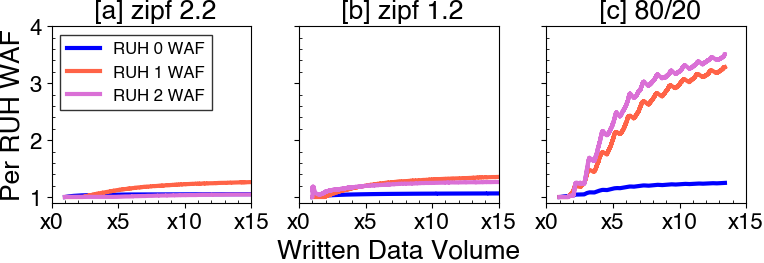

In [27]:
#------------------------------------------------------------#
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
fig, ax = plt.subplots(1,3, figsize=(8,3), sharey=True)
MEDIUM_PLUS_SIZE = MEDIUM_SIZE+3
#------------------------------------------------------------#
#fdev="Samsung-FDP-PM9D3a-MZWL67T6HBLC-7.68TB-PCIeGen5/"
workload= [ 
            'log-gc-zipf22-fdp',
            'log-gc-zipf12-fdp',
            'log-gc-zoned-fdp',
            ]
mini_titles= [
            '[a] zipf 2.2',
            '[b] zipf 1.2',
            '[c] 80/20'
            ]
color = ['blue' , 'tomato' , 'orchid', 'gray']
bcolor = ['#89CFF0', '#FFB3AB', '#E6A9EC', '#D3D3D3']
this_dev_cap = 224
hop=5
this_dev_cap_GB = 224 * 1024 * 1024 * 1024
TEXT_FONT_SIZE=SMALL_SIZE
#subdirs=[ 'nofdp/','fdp/','fdp_share/', 'fdp_share2/', 'fdp_sharev0/'] 
data_dir = "./archive//ops-log/"
#data_dir = "/home/inho/cylon-fdp/build-femu/"

#util = ['{0}/'.format(x*100) for x in np.arange(1,6) ]
#bbss = ['{0}K/'.format(4**x) for x in np.arange(1,5)]
#print(bbss)
# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    
    ret = check_file_existence(data_dir,w)
    if (ret == 0):
        continue

    # ----------------------- Regular Expr. ------------------------- #
    num_re=re.compile(r'[0-9]+')
    #float_re=re.compile(r'[0-9]\.[0-9]+')
    hbmw_re=re.compile(r'.*(HBMW)')
    mbmw_re=re.compile(r'.*(MBMW)')
    mbe_re=re.compile(r'.*(MBE)')
    util_data = data_dir
    file1 = open(util_data + w, 'r')
    hbmw_total = []
    avg_util={
        0:[],
        1:[],
        2:[]
    }
    valid_util={
        0:[],
        1:[],
        2:[]
    }
    ruh_hbmw={
        0:[],
        1:[],
        2:[]
    }
    ruh_mbmw={
        0:[],
        1:[],
        2:[]
    }

    Lines = file1.readlines()
    for j, line in enumerate(Lines) : 
        line = ''.join(line).strip().replace(",", '')
        #if num_re.match(line):
        l = num_re.findall(line)
        l = [ int(x) for x in l ]
        if(len(l) <= 3 ):
            continue
        #print(l)
        #print(l[0], l[1], l[2], l[4]/l[5], type( l[4]/l[5]))
        # if l[2] != 0:
        #     print( "is_force {0} util {1} ruhid {2}".format(l[0], float(l[4]/l[5]), l[2]) )

        value_hbmw_total = 0
        for idx,id in enumerate(range(3)):
            ruhid=l[ 6 + idx*3 ]
            value=l[ 6 + idx*3 + 1]
            value_2nd=l[ 6 + idx*3 + 2]
            value_ruh_hbmw = l[ 15 + idx*3 + 1 ]
            value_ruh_mbmw = l[ 15 + idx*3 + 2 ]
            value_hbmw_total += value_ruh_hbmw
            if ( not (ruhid in avg_util )): #(not (key in data_column) )
                avg_util[ruhid] = [value]
                valid_util[ruhid] = [value_2nd / l[5]]
                ruh_hbmw[ruhid] = [value_ruh_hbmw  / this_dev_cap_GB]
                ruh_mbmw[ruhid] = [value_ruh_mbmw  / this_dev_cap_GB]

            else:
                avg_util[ruhid].append(value)
                valid_util[ruhid].append(value_2nd / l[5])
                ruh_hbmw[ruhid].append(value_ruh_hbmw  / this_dev_cap_GB)
                ruh_mbmw[ruhid].append(value_ruh_mbmw  / this_dev_cap_GB)
        
        hbmw_total.append( value_hbmw_total / ( this_dev_cap * 2**30 ) )

        if j > 50000:
            break
    # -------------------------- AX ---------------------------- #
    ax2=ax[i]
    bottom = np.zeros( len(avg_util[0]) )
    for c, key in enumerate(avg_util.keys()):
        
        #ax2.plot( hbmw_total , avg_util[key], color=bcolor[c])
        ax2.plot( hbmw_total ,np.array(ruh_mbmw[key]) / np.array(ruh_hbmw[key]), label="RUH {0} WAF".format(key), lw=3, color=color[c])
        #print (key, len([ x for x in avg_util[key] if x is not None]) )
        #bottom += avg_util[key]
        
    ax2.set_title(" {0}".format(mini_titles[i]), fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
    ax2.set_ylim([0.9, 4])
    ax2.set_xlim([0, 15])
    ax2.set_xticks([x*hop for x in range(0,4)])

    labels = [label.get_text() for label in ax2.get_xticklabels()]
    ax2.set_xticklabels([f"x{t}" for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
    #ax2.legend()
    ax2.tick_params(axis='x', which='minor', direction='in')
    ax2.tick_params(axis='y', which='minor', direction='in')
    ax2.minorticks_on()
    # -------------------------- AX ---------------------------- #

# --------------------------- Figure ------------------------ # 
ax[0].set_ylabel("Per RUH WAF" , fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1].set_xlabel("Written Data Volume", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[0].legend(loc="upper left",prop=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE, edgecolor='k', fancybox=False)
for label in ax[0].get_yticklabels():
    label.set_fontproperties(helvetica_prop)
    label.set_fontsize(MEDIUM_SIZE)


ax[0].set_yticks([1,2,3,4])

plt.tight_layout()
# ------------------- #
isConference=False
if isConference:
   save_dir = "/home/inho/git/fast25-cylon-fdp/v1/F/observ/"
   fig_name = "Noisy"
   plt.savefig("{0}{1}.eps".format(save_dir,fig_name) )
   plt.savefig("{0}{1}.pdf".format(save_dir,fig_name) )
   plt.savefig("{0}{1}.png".format(save_dir,fig_name) )
   plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name))
# ------------------- #


Processing: log-gc-zoned-fdp
Processing: log-gc-zoned-RU256OP5
Processing: log-gc-zoned-RU256OP7
Processing: log-gc-zoned-RU256OP14
Processing: log-gc-zoned-RU128OP5


Processing: log-gc-zoned-RU128OP7
Processing: log-gc-zoned-RU128OP10
Processing: log-gc-zoned-RU128OP14
Processing: log-ii-zoned-RU256OP5
Processing: log-ii-zoned-RU256OP7
Processing: log-ii-zoned-RU256OP10
Processing: log-ii-zoned-RU256OP14
Processing: log-ii-zoned-RU128OP5
Processing: log-ii-zoned-RU128OP7
Processing: log-ii-zoned-RU128OP10
Processing: log-ii-zoned-RU128OP14


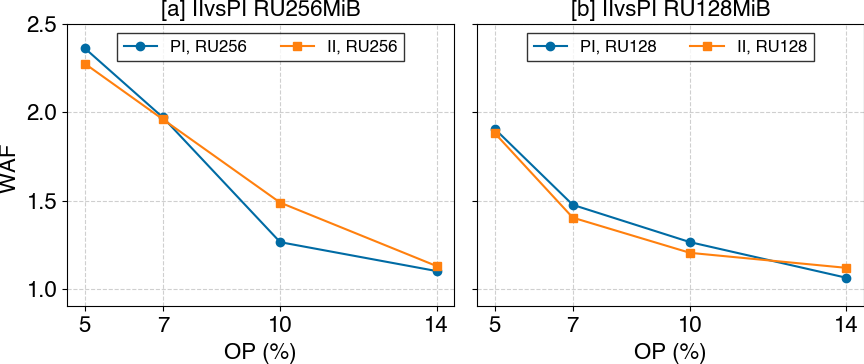

In [10]:
import numpy as np
import re
import os

data_dir = "./archive//ops-log/"
workloads = [
    'log-gc-zoned-fdp',            # PI RU256 OP10
    'log-gc-zoned-RU256OP5',        # PI RU256 OP5
    'log-gc-zoned-RU256OP7',        # PI RU256 OP7
    'log-gc-zoned-RU256OP14',        # PI RU256 OP14

    'log-gc-zoned-RU128OP5',       # PI RU128 OP5
    'log-gc-zoned-RU128OP7',       # PI RU128 OP7
    'log-gc-zoned-RU128OP10',      # PI RU128 OP10
    'log-gc-zoned-RU128OP14',      # PI RU128 OP14

    'log-ii-zoned-RU256OP5',       # II RU256 OP5
    'log-ii-zoned-RU256OP7',
    'log-ii-zoned-RU256OP10',      # II RU256 OP10
    'log-ii-zoned-RU256OP14',      # II RU256 OP10

    'log-ii-zoned-RU128OP5',       # II RU128 OP5
    'log-ii-zoned-RU128OP7',       # II RU128 OP7
    'log-ii-zoned-RU128OP10',      # II RU128 OP10
    'log-ii-zoned-RU128OP14',      # II RU128 OP14
]

# Mapping workload to (op, type, ru)
workload_info = {
    'log-gc-zoned-fdp': ('PI', 256, 10),
    'log-gc-zoned-RU256OP5': ('PI', 256, 5),
    'log-gc-zoned-RU256OP7': ('PI', 256, 7),
    'log-gc-zoned-RU256OP14': ('PI', 256, 14),

    'log-gc-zoned-RU128OP5': ('PI', 128, 5),    
    'log-gc-zoned-RU128OP7': ('PI', 128, 7),
    'log-gc-zoned-RU128OP10': ('PI', 128, 10),
    'log-gc-zoned-RU128OP14': ('PI', 128, 14),

    'log-ii-zoned-RU256OP5': ('II', 256, 5),
    'log-ii-zoned-RU256OP7': ('II', 256, 7),
    'log-ii-zoned-RU256OP10': ('II', 256, 10),
    'log-ii-zoned-RU256OP14': ('II', 256, 14),

    'log-ii-zoned-RU128OP5': ('II', 128, 5),
    'log-ii-zoned-RU128OP7': ('II', 128, 7),
    'log-ii-zoned-RU128OP10': ('II', 128, 10),
    'log-ii-zoned-RU128OP14': ('II', 128, 14),

}

# Result containers
results = {'PI': {5: [], 7: [], 10: [],14: []}, 'II': {5: [],7: [], 10: [], 14: []}}

data_field_cnt = 3
this_dev_cap = 224 * (2**30)  # adjust device capacity
this_dev_cap_GB = this_dev_cap / (2**30)

def check_file_existence(data_dir, fname):
    return os.path.exists(os.path.join(data_dir, fname))

#=======
# Initialize data containers
hbmw_data = {}
mbmw_data = {}

x_point = 5

for w in workloads:
    is_ii = 'ii' in w.lower()
    ruhs = [0, 1, 2, 7] if is_ii else [0, 1, 2]
    nruh = len(ruhs)

    hbmw_data[w] = [[-1] for _ in range(nruh)]
    mbmw_data[w] = [[-1] for _ in range(nruh)]

    if not check_file_existence(data_dir, w):
        print(f"File not found: {w}")
        continue

    print(f"Processing: {w}")
    file_path = os.path.join(data_dir, w)
    with open(file_path, 'r') as file:
        lines = file.readlines()

    local_ruh_hbmw = [[] for _ in ruhs]
    local_ruh_mbmw = [[] for _ in ruhs]
    anchor_index = 0
    cnt = 0

    for line in lines:
        line = line.strip().replace(",", "")
        l = re.findall(r'[0-9]+', line)
        l = [int(x) for x in l]
        if len(l) < 3:
            continue

        base = 6
        base_2nd = base + (data_field_cnt * nruh)
        value_hbmw_total = 0

        for idx in range(nruh):
            value_ruh_hbmw = l[base_2nd + idx * data_field_cnt + 1]
            value_hbmw_total += value_ruh_hbmw

        rHMW = value_hbmw_total / this_dev_cap

        if (x_point * (anchor_index + 1) - 0.1 < rHMW <= x_point * (anchor_index + 1) + 0.1):
            for idx in range(nruh):
                value_ruh_hbmw = l[base_2nd + idx * data_field_cnt + 1]
                value_ruh_mbmw = l[base_2nd + idx * data_field_cnt + 2]
                local_ruh_hbmw[idx].append(value_ruh_hbmw)
                local_ruh_mbmw[idx].append(value_ruh_mbmw)
            cnt += 1
        else:
            if cnt >= 1:
                for idx in range(nruh):
                    try:
                        hbmw_val = np.mean(local_ruh_hbmw[idx]) / 2**30
                        mbmw_val = np.mean(local_ruh_mbmw[idx]) / 2**30

                        if ruhs[idx] == 7:
                            hbmw_val = 0  # GC has no host writes

                        hbmw_data[w][idx][anchor_index] = hbmw_val
                        mbmw_data[w][idx][anchor_index] = mbmw_val
                    except IndexError:
                        print("IndexError at workload:", w, "index:", idx)

                cnt = 0
                local_ruh_hbmw = [[] for _ in ruhs]
                local_ruh_mbmw = [[] for _ in ruhs]
                anchor_index += 1

        if anchor_index >= 1:
            break

# hbmw_data and mbmw_data now contain the 5rHMW snapshot for all workloads

#==== 
import matplotlib.pyplot as plt
import numpy as np

plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)

device_capacity = 224 * 1024 * 1024 * 1024  # bytes
device_capacity_gib = device_capacity / 2**30

for w in workloads:
    config_type, ru, op = workload_info[w]

    ruh_mbmw = []
    ruh_hbmw = []
    is_ii = 'ii' in w.lower()
    ruhs = [0, 1, 2, 7] if is_ii else [0, 1, 2]
    nruh = len(ruhs)
    
    for ruh in range(nruh):
        try:
            val_mbmw = mbmw_data[w][ruh][0]  # at x5 rHMW
            val_hbmw = hbmw_data[w][ruh][0]
        except (IndexError, KeyError):
            continue
        ruh_mbmw.append(val_mbmw)
        ruh_hbmw.append(val_hbmw)

    total_mbmw = sum(ruh_mbmw)
    total_hbmw = sum(ruh_hbmw)
    dlwa_total = total_mbmw / total_hbmw if total_hbmw > 0 else 0

    results[config_type][op].append((ru, dlwa_total))

# Plotting
fig, ax = plt.subplots(1,2 , figsize=(9, 4), sharey=True)

#for config_type, marker, color in zip(['PI', 'II'], ['o', 's'], ['blue', 'green']):
for config_type, marker in zip(['PI', 'II'], ['o', 's']):
    op_list = sorted(results[config_type].keys())
    for ru_size in [ 256]:
        x_op = []
        y_dlwas = []
        for op in op_list:
            matched = [dlwa for ru, dlwa in results[config_type][op] if ru == ru_size]
            if matched:
                x_op.append(op)
                y_dlwas.append(matched[0])
        if x_op:
            ax[0].plot(x_op, y_dlwas, marker=marker, linestyle='-',
                    label=f'{config_type}, RU{ru_size}')
    for ru_size in [128]:
        x_op = []
        y_dlwas = []
        for op in op_list:
            matched = [dlwa for ru, dlwa in results[config_type][op] if ru == ru_size]
            if matched:
                x_op.append(op)
                y_dlwas.append(matched[0])
        if x_op:
            ax[1].plot(x_op, y_dlwas, marker=marker, linestyle='-',
                    label=f'{config_type}, RU{ru_size}')

# Labels and grid
#ax[0].set_title('DLWA vs Overprovisioning % (x5 rHMW)', fontsize=BIGGER_SIZE)
ax[0].set_title('[a] IIvsPI RU256MiB', fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
ax[1].set_title('[b] IIvsPI RU128MiB', fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)

ax[0].set_xlabel('OP (%)', fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
ax[1].set_xlabel('OP (%)', fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)

ax[0].set_ylabel('WAF ', fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
ax[0].set_ylim([0.9, 2.5])
ax[0].set_xticks([5, 7, 10,14])
ax[0].set_yticks([1, 1.5, 2, 2.5])

ax[0].grid(True, linestyle='--', alpha=0.6)
ax[1].set_xticks([5, 7, 10,14])
ax[1].grid(True, linestyle='--', alpha=0.6)

ax[0].legend(loc = 'upper center', prop=helvetica_prop, edgecolor='k', fancybox=False ,fontsize=MEDIUM_SIZE+4, ncol=2)
ax[1].legend(loc = 'upper center', prop=helvetica_prop, edgecolor='k', fancybox=False ,fontsize=MEDIUM_SIZE+4, ncol=2)

plt.tight_layout()

# Save
#------------------- #
isConference=False
if isConference:
    save_dir = "/home/inho/git/fast25-cylon-fdp/v1/F/observ/"
    fig_name = "fdp_8020_IIvsPI-OPSplot2"
    plt.savefig("{0}{1}.eps".format(save_dir,fig_name))
    plt.savefig("{0}{1}.pdf".format(save_dir,fig_name))
    plt.savefig("{0}{1}.png".format(save_dir,fig_name))
    plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name))
#------------------- #

/tmp/ipykernel_2332358/2236574566.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()  # leave room for the shared legend


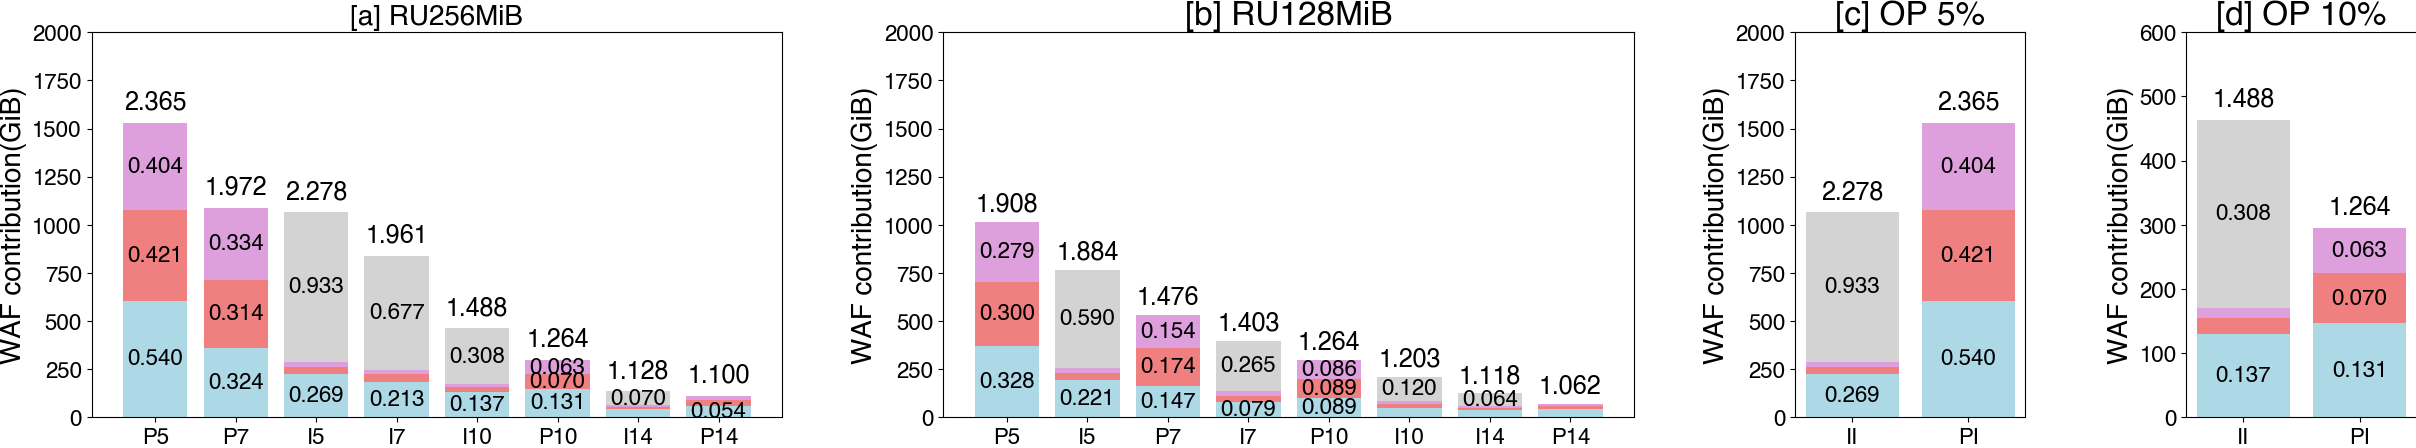

In [11]:
## RUN previous figure first 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import re

# --- you already have these: ruh labels/colors, mbmw_data, hbmw_data, etc.
ruh_labels = ['RUH0','RUH1','RUH2','GC-RUH']
colors     = ['lightblue','lightcoral','plum','lightgray']

def compute_bar_segments(workloads_subset):
    """Return (bar_segments, dlwa_texts) for a given workloads list."""
    bar_segments = []   # shape: (len(workloads_subset), 4)
    dlwa_texts   = []
    for w in workloads_subset:
        ruh_mbmw, ruh_hbmw = [], []
        for ruh in range(4):
            try:
                val_mbmw = mbmw_data[w][ruh][0]  # x5 rHMW slot
                val_hbmw = hbmw_data[w][ruh][0]
                diff     = max(val_mbmw - val_hbmw, 0)
            except (IndexError, KeyError):
                val_mbmw, val_hbmw, diff = 0, 0, 0
            ruh_mbmw.append(val_mbmw)
            ruh_hbmw.append(val_hbmw)
        bar_segments.append([max(m-h,0) for m,h in zip(ruh_mbmw, ruh_hbmw)])
        total_mbmw = sum(ruh_mbmw)
        total_hbmw = sum(ruh_hbmw)
        dlwa_texts.append(total_mbmw/total_hbmw if total_hbmw>0 else 0)
    return np.array(bar_segments), dlwa_texts

def draw_panel(ax, data_dir, workloads_subset, xtick_labels):
    """Stacked bars + per-segment dlwa_contrib annotations (your rules kept)."""
    bar_segments, dlwa_texts = compute_bar_segments(workloads_subset)
    y_pos   = np.arange(len(workloads_subset))
    left    = np.zeros(len(workloads_subset))
    for i in range(4):
        bars = ax.bar(y_pos, bar_segments[:, i], bottom=left,
                      color=colors[i], label=ruh_labels[i])
        for j, bar in enumerate(bars):
            try:
                mbmw_i = mbmw_data[workloads_subset[j]][i][0]
                hbmw_i = hbmw_data[workloads_subset[j]][i][0]
                total_hbmw = sum(hbmw_data[workloads_subset[j]][k][0] for k in range(3))
                dlwa_contrib = (mbmw_i - hbmw_i) / total_hbmw if total_hbmw>0 else 0
                width = bar.get_width()
            except (IndexError, KeyError):
                continue
            
            # same text placement logic you used (simplified defaults)
            if dlwa_contrib > 0.05:
                ax.text(bar.get_x()+width/2, bar.get_y()+bar.get_height()/2,
                        f'{dlwa_contrib:.3f}', ha='center', va='center', fontsize=MEDIUM_SIZE, color='black')
        left += bar_segments[:, i]

    # total DLWA label above each bar
    for i, dlwa in enumerate(dlwa_texts):
        ax.text(i, left[i] + max(left)*0.03, f'{dlwa:.3f}', ha='center', va='bottom', fontsize=MEDIUM_SIZE+2, color='black')

    ax.set_xticks(y_pos)
    ax.set_xticklabels(xtick_labels)
    ax.set_ylabel('WAF contribution(GiB)', fontproperties = helvetica_prop, fontsize=MEDIUM_SIZE+4)

# ----------------------- gridspec layout -----------------------
fig = plt.figure(figsize=(30, 5))
gs  = GridSpec(nrows=1, ncols=4, figure=fig, width_ratios=[1.2, 1.2, 0.4,0.4], height_ratios=[1.0], wspace=0.35, hspace=0.55)

ax_a = fig.add_subplot(gs[0, 0])  # (a) big left
ax_b = fig.add_subplot(gs[0, 1])  # (b) big middle
ax_c = fig.add_subplot(gs[0, 2])  # (c) small top-right
ax_d = fig.add_subplot(gs[0, 3])  # (d) small bottom-right

# ------------------------ panels & titles ----------------------
# (a) RU 256 MiB – show all OP points you have for RU256
data_dir = "./archive//ops-log/"

wl_a = [
    'log-gc-zoned-RU256OP5',        # PI RU256 OP5
    'log-gc-zoned-RU256OP7',        # PI RU256 OP7
    'log-ii-zoned-RU256OP5',       # II RU256 OP5
    'log-ii-zoned-RU256OP7',        # II RU256 OP7
    'log-ii-zoned-RU256OP10',      # II RU256 OP10
    'log-gc-zoned-fdp',            # PI RU256 OP10
    'log-ii-zoned-RU256OP14',      # II RU256 OP14
    'log-gc-zoned-RU256OP14',        # PI RU256 OP14
]
# example ordering ⇒ P5, I5, P10, I10
lbl_a = ['P5','P7', 'I5', 'I7', 'I10','P10','I14','P14']
draw_panel(ax_a,data_dir, wl_a, lbl_a)
ax_a.set_title('[a] RU256MiB', fontproperties = helvetica_prop, fontsize=MEDIUM_SIZE+4)

# (b) RU 128 MiB – show all OP points you have for RU128
wl_b = [
    'log-gc-zoned-RU128OP5',       # PI RU128 OP5
    'log-ii-zoned-RU128OP5',       # II RU128 OP5
    'log-gc-zoned-RU128OP7',       # PI RU128 OP7
    'log-ii-zoned-RU128OP7',       # II RU128 OP7
    'log-gc-zoned-RU128OP10',      # PI RU128 OP10
    'log-ii-zoned-RU128OP10',      # II RU128 OP10
    'log-ii-zoned-RU128OP14',      # II RU128 OP10
    'log-gc-zoned-RU128OP14',      # PI RU128 OP10
]

lbl_b = ['P5', 'I5', 'P7', 'I7', 'P10', 'I10','I14','P14']
draw_panel(ax_b,data_dir, wl_b, lbl_b)
ax_b.set_title('[b] RU128MiB', fontproperties = helvetica_prop, fontsize=BIGGER_SIZE)

# (c) OP 5% – compare II vs PI (RU sizes on x)
wl_c = ['log-ii-zoned-RU256OP5','log-gc-zoned-RU256OP5']
lbl_c = ['II','PI']
draw_panel(ax_c,data_dir, wl_c, lbl_c)
ax_c.set_title('[c] OP 5%', fontproperties = helvetica_prop, fontsize=BIGGER_SIZE)

# (d) OP 10% – compare II vs PI (only RU256 here, change if you have RU128 too)
wl_d = ['log-ii-zoned-RU256OP10','log-gc-zoned-fdp']   # PI RU256 OP10 name you used
lbl_d = ['II','PI']
draw_panel(ax_d,data_dir, wl_d, lbl_d)
ax_d.set_title('[d] OP 10%', fontproperties = helvetica_prop, fontsize=BIGGER_SIZE)

# ---------------- shared legend (top center) -------------------
#handles, labels = ax_a.get_legend_handles_labels()
#leg = fig.legend(handles, labels, loc='upper center', ncol=4, frameon=True, fancybox=False, edgecolor='k')

# Optional common y-limit so panel scales match your figure
for ax in (ax_a, ax_b, ax_c):
    ax.set_ylim(0, 2000)  # adjust if your range differs
ax_d.set_ylim(0,600)
fig.tight_layout()  # leave room for the shared legend
#------------------- #
isConference=False
if isConference:
    save_dir = "/home/inho/git/fast25-cylon-fdp/v1/F/val/"
    fig_name = "fdp_8020_IIvsPI-all"
    plt.savefig("{0}{1}.eps".format(save_dir,fig_name))
    plt.savefig("{0}{1}.pdf".format(save_dir,fig_name))
    plt.savefig("{0}{1}.png".format(save_dir,fig_name))
    plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name))
#------------------- #